# Maps of the transmission network

This notebook contains various maps of the transmission network, created using [PyGMT](https://www.pygmt.org/), a Python interface for the [Generic Mapping Tools](https://www.generic-mapping-tools.org/).

In [1]:
import pygmt

Import model files:

In [2]:
import json

with open('../europe.json') as f:
    europe = json.load(f)

with open('../switzerland.json') as f:
    switzerland = json.load(f)

with open('../germany.json') as f:
    germany = json.load(f)

with open('../france.json') as f:
    france = json.load(f)

with open('../spain.json') as f:
    spain = json.load(f)

with open('../italy.json') as f:
    italy = json.load(f)

## Base map

The region to be mapped is defined in terms of latitude (from 34°N to 59° N) and longitude (from 12° W to 31° E):

In [3]:
region = [-12, 31, 34, 59]

Countries that are part of the model are shaded in gray (including Kosovo, which is not separated from Serbia in PanTaGruEl, as well as Andorra and San Marino that do not have any high-voltage buses):

In [4]:
countries = {bus['country'] for bus in europe['bus'].values()}.union({'XK', 'AD', 'SM'}) - {'XX'}

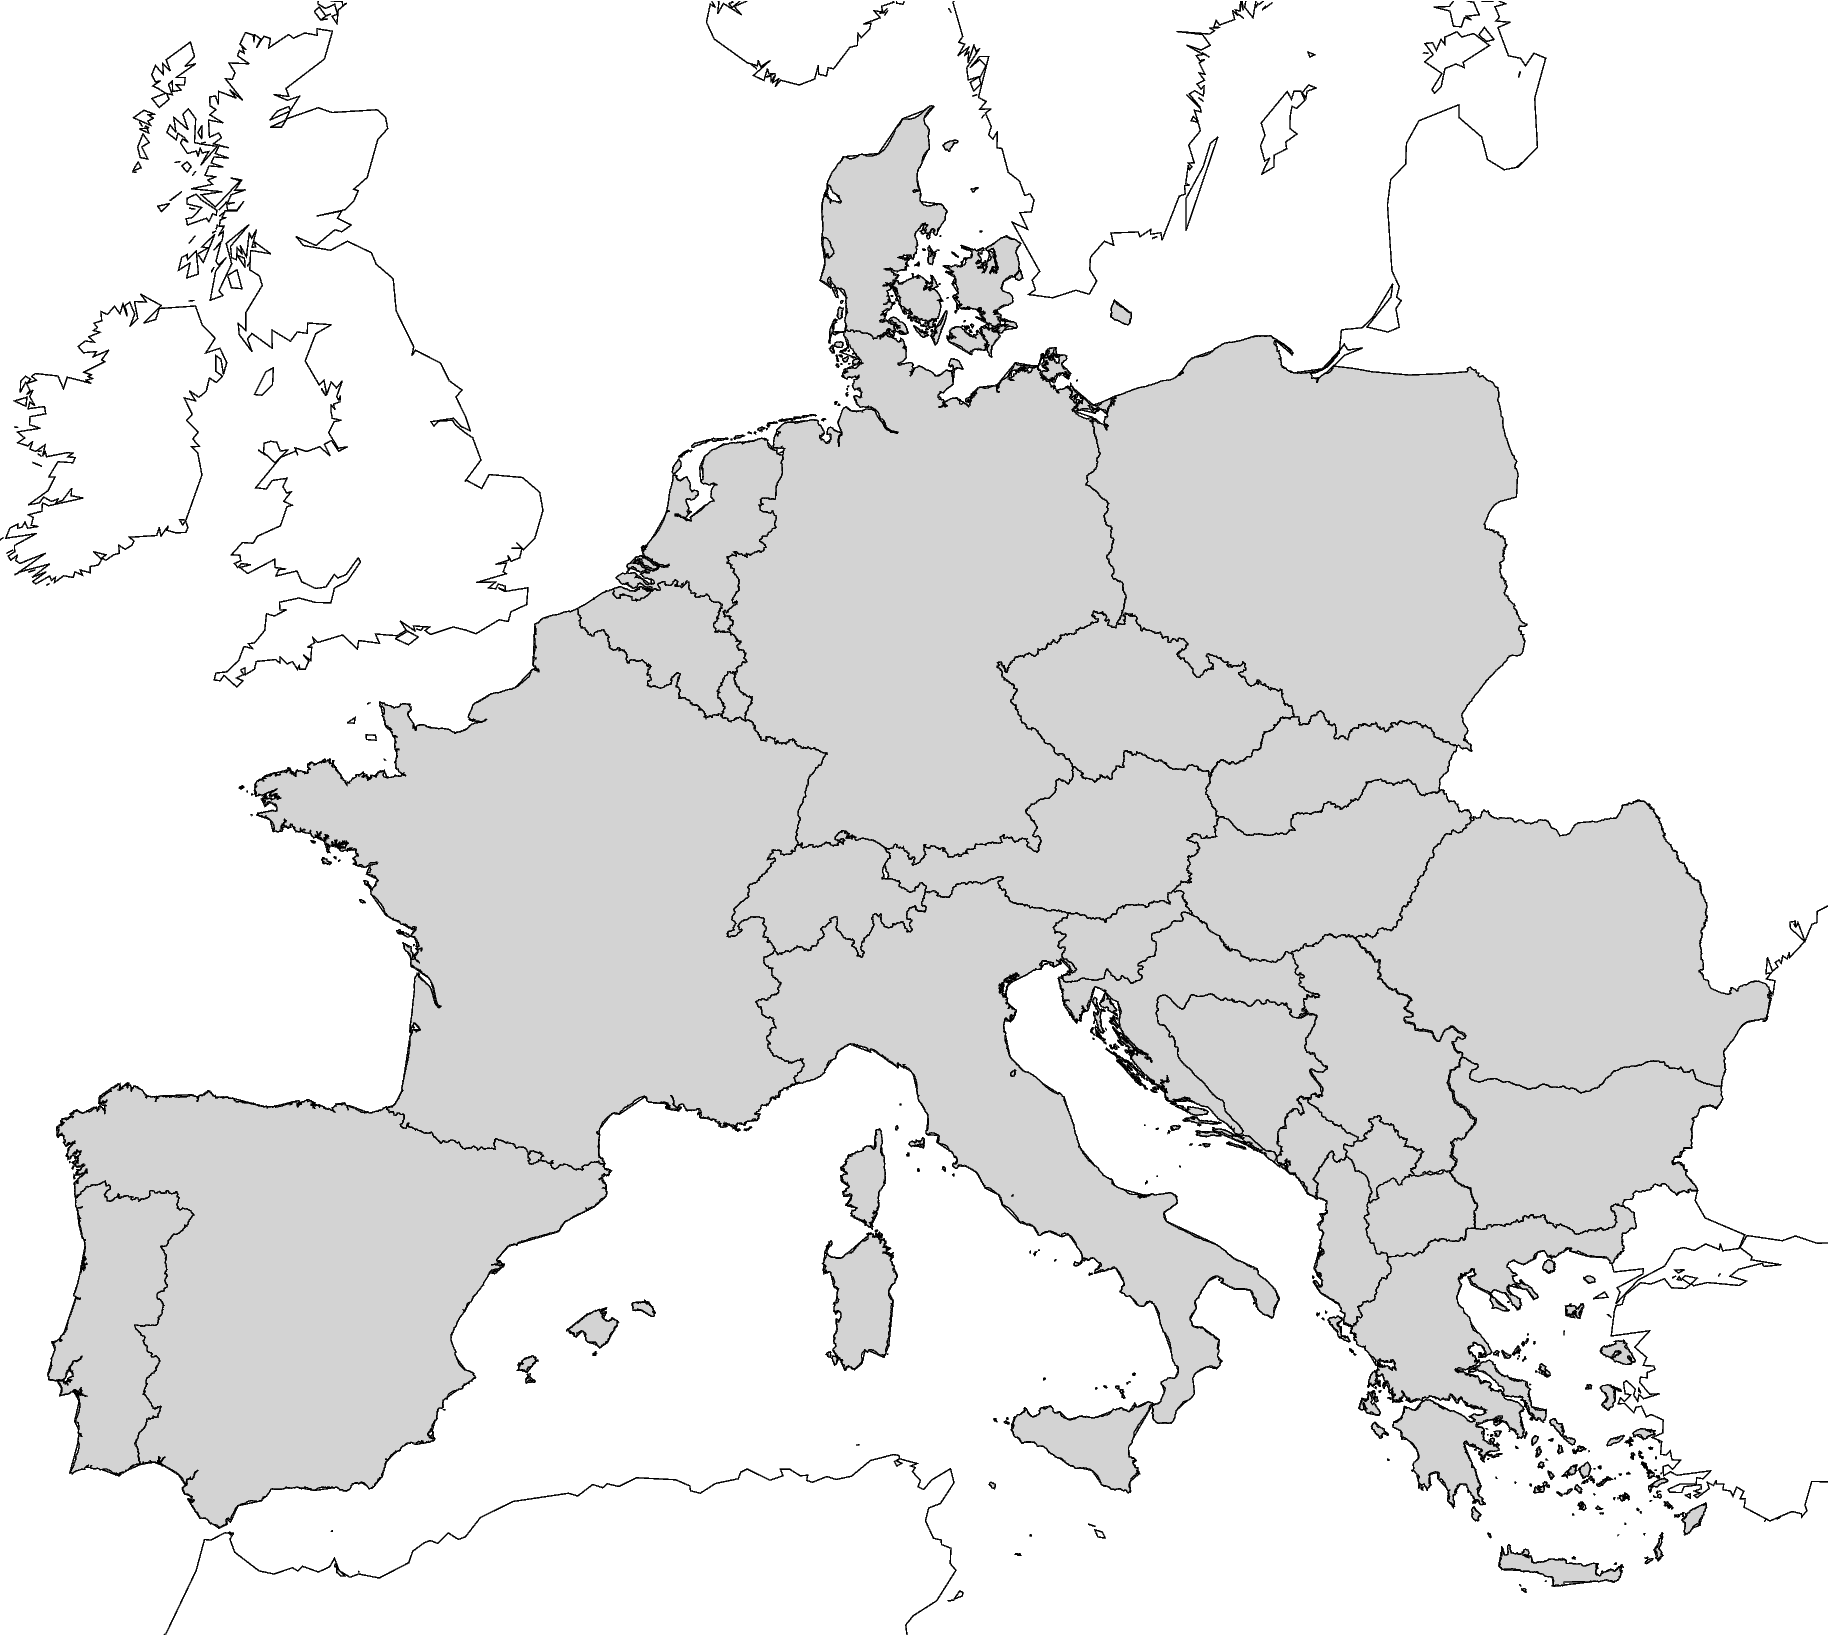

In [5]:
fig = pygmt.Figure()

fig.coast(region=region, projection='M16c', resolution='l',
          shorelines='1/0.2p,black', # coast only, no lakes
          dcw=['%s+p0.2p,black+glightgray' % country for country in countries]) # country borders 

fig.show()

## Buses

Map of all the buses in the model:

In [6]:
all_buses = [bus['coord'] for bus in europe['bus'].values()]

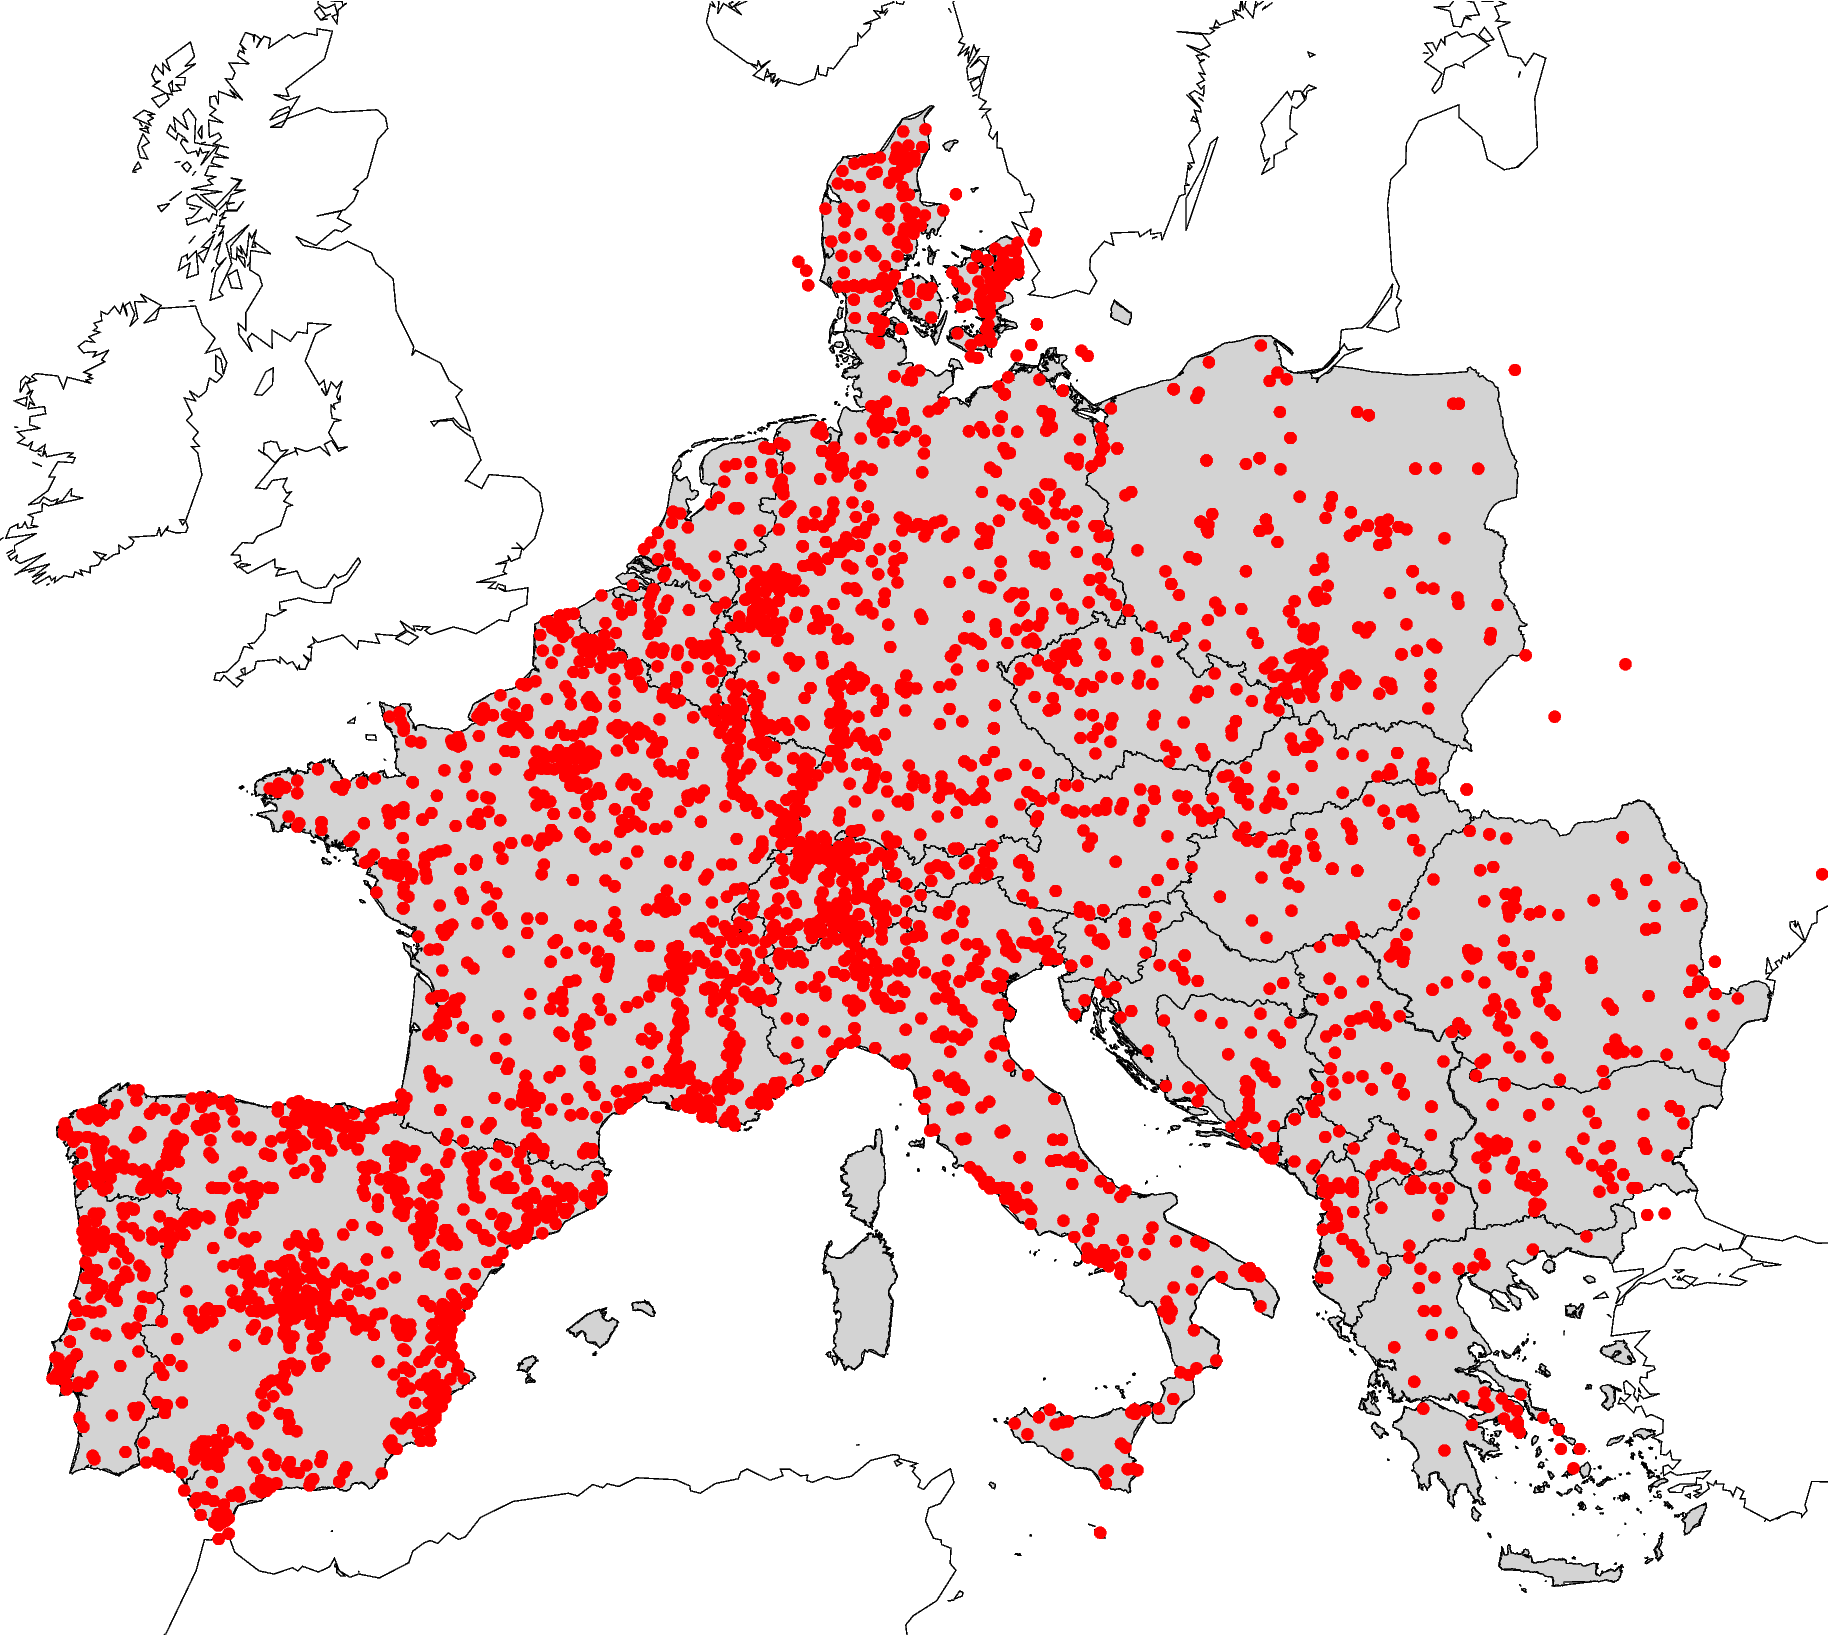

In [7]:
fig = pygmt.Figure()

fig.coast(region=region, projection='M16c', resolution='l',
          shorelines='1/0.2p,black', # coast only, no lakes
          dcw=['%s+p0.2p,black+glightgray' % country for country in countries]) # country borders

fig.plot(data = all_buses, style='c0.1c', fill='red')

fig.show()

## Lines

Map of all the lines in the model:

In [8]:
lines = [(europe['bus'][str(line['f_bus'])]['coord'], europe['bus'][str(line['t_bus'])]['coord'])
         for line in europe['branch'].values() if line['transformer'] == False]

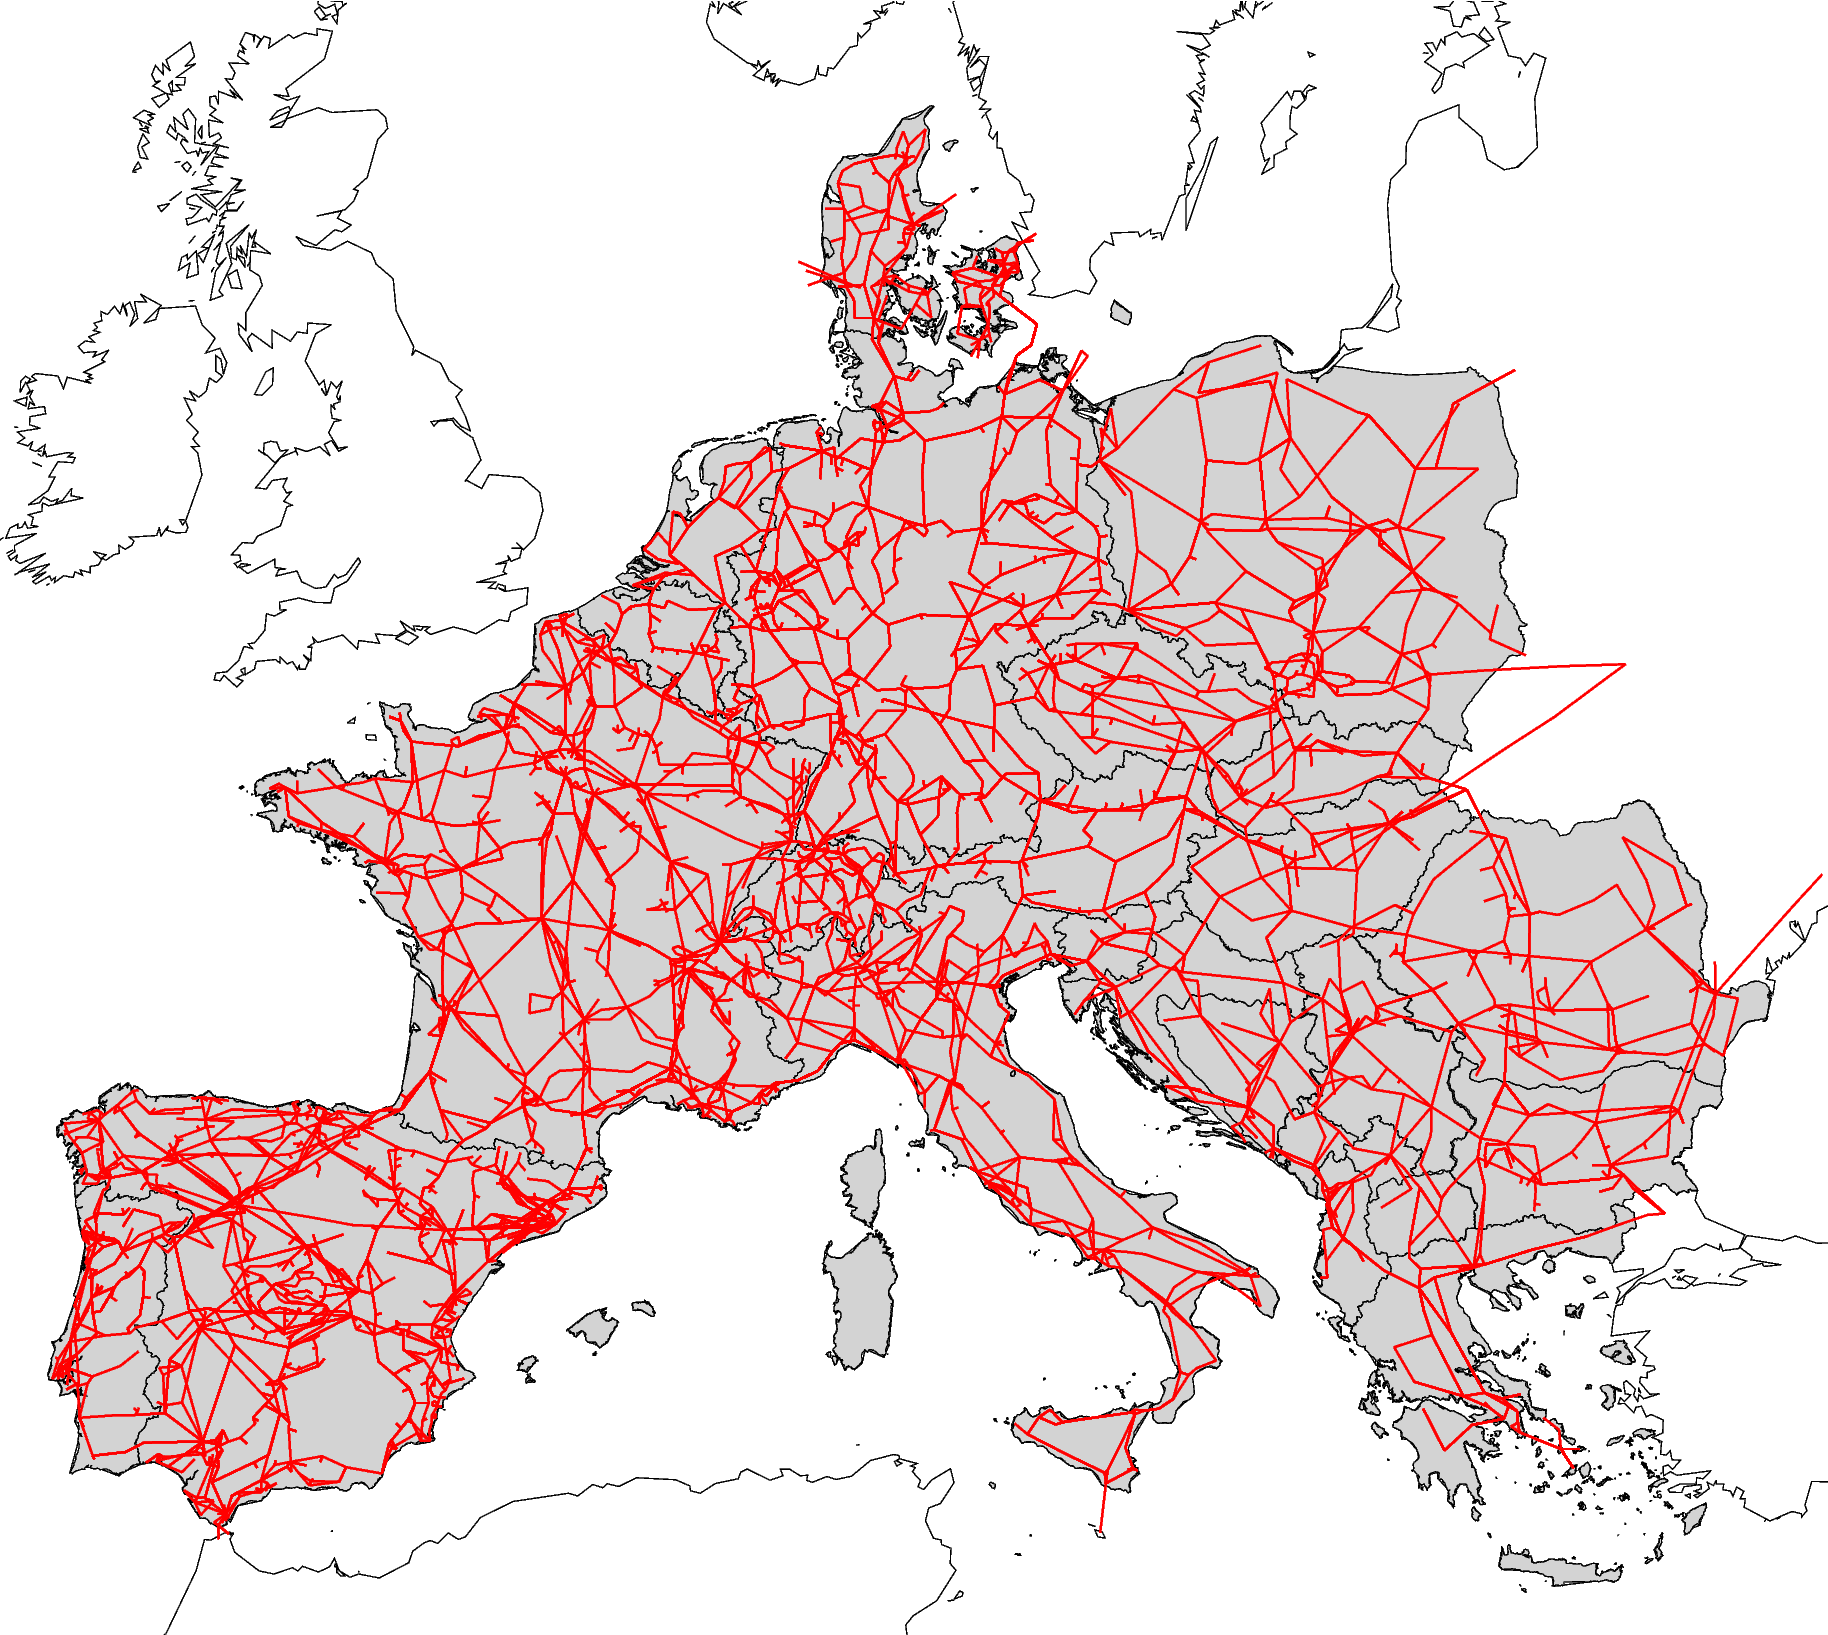

In [9]:
fig = pygmt.Figure()

fig.coast(region=region, projection='M16c', resolution='l',
          shorelines='1/0.2p,black', # coast only, no lakes
          dcw=['%s+p0.2p,black+glightgray' % country for country in countries]) # country borders

for line in lines:
    fig.plot(x = [line[0][0], line[1][0]], y = [line[0][1], line[1][1]], pen='0.5p,red')

fig.show()

### Lines colored by voltage

There are four distinct voltage levels in the model:

In [10]:
voltage_levels = {bus['base_kv'] for bus in europe['bus'].values()}
voltage_levels

{132, 220, 380, 750}

We assign one color to each voltage level:

In [11]:
voltage_color = {
    132: 'blue',
    220: 'darkgreen',
    380: 'red',
    750: 'orange'
}

In [12]:
lines = [(europe['bus'][str(line['f_bus'])]['coord'], europe['bus'][str(line['t_bus'])]['coord'],
          europe['bus'][str(line['f_bus'])]['base_kv'])
         for line in europe['branch'].values() if line['transformer'] == False]

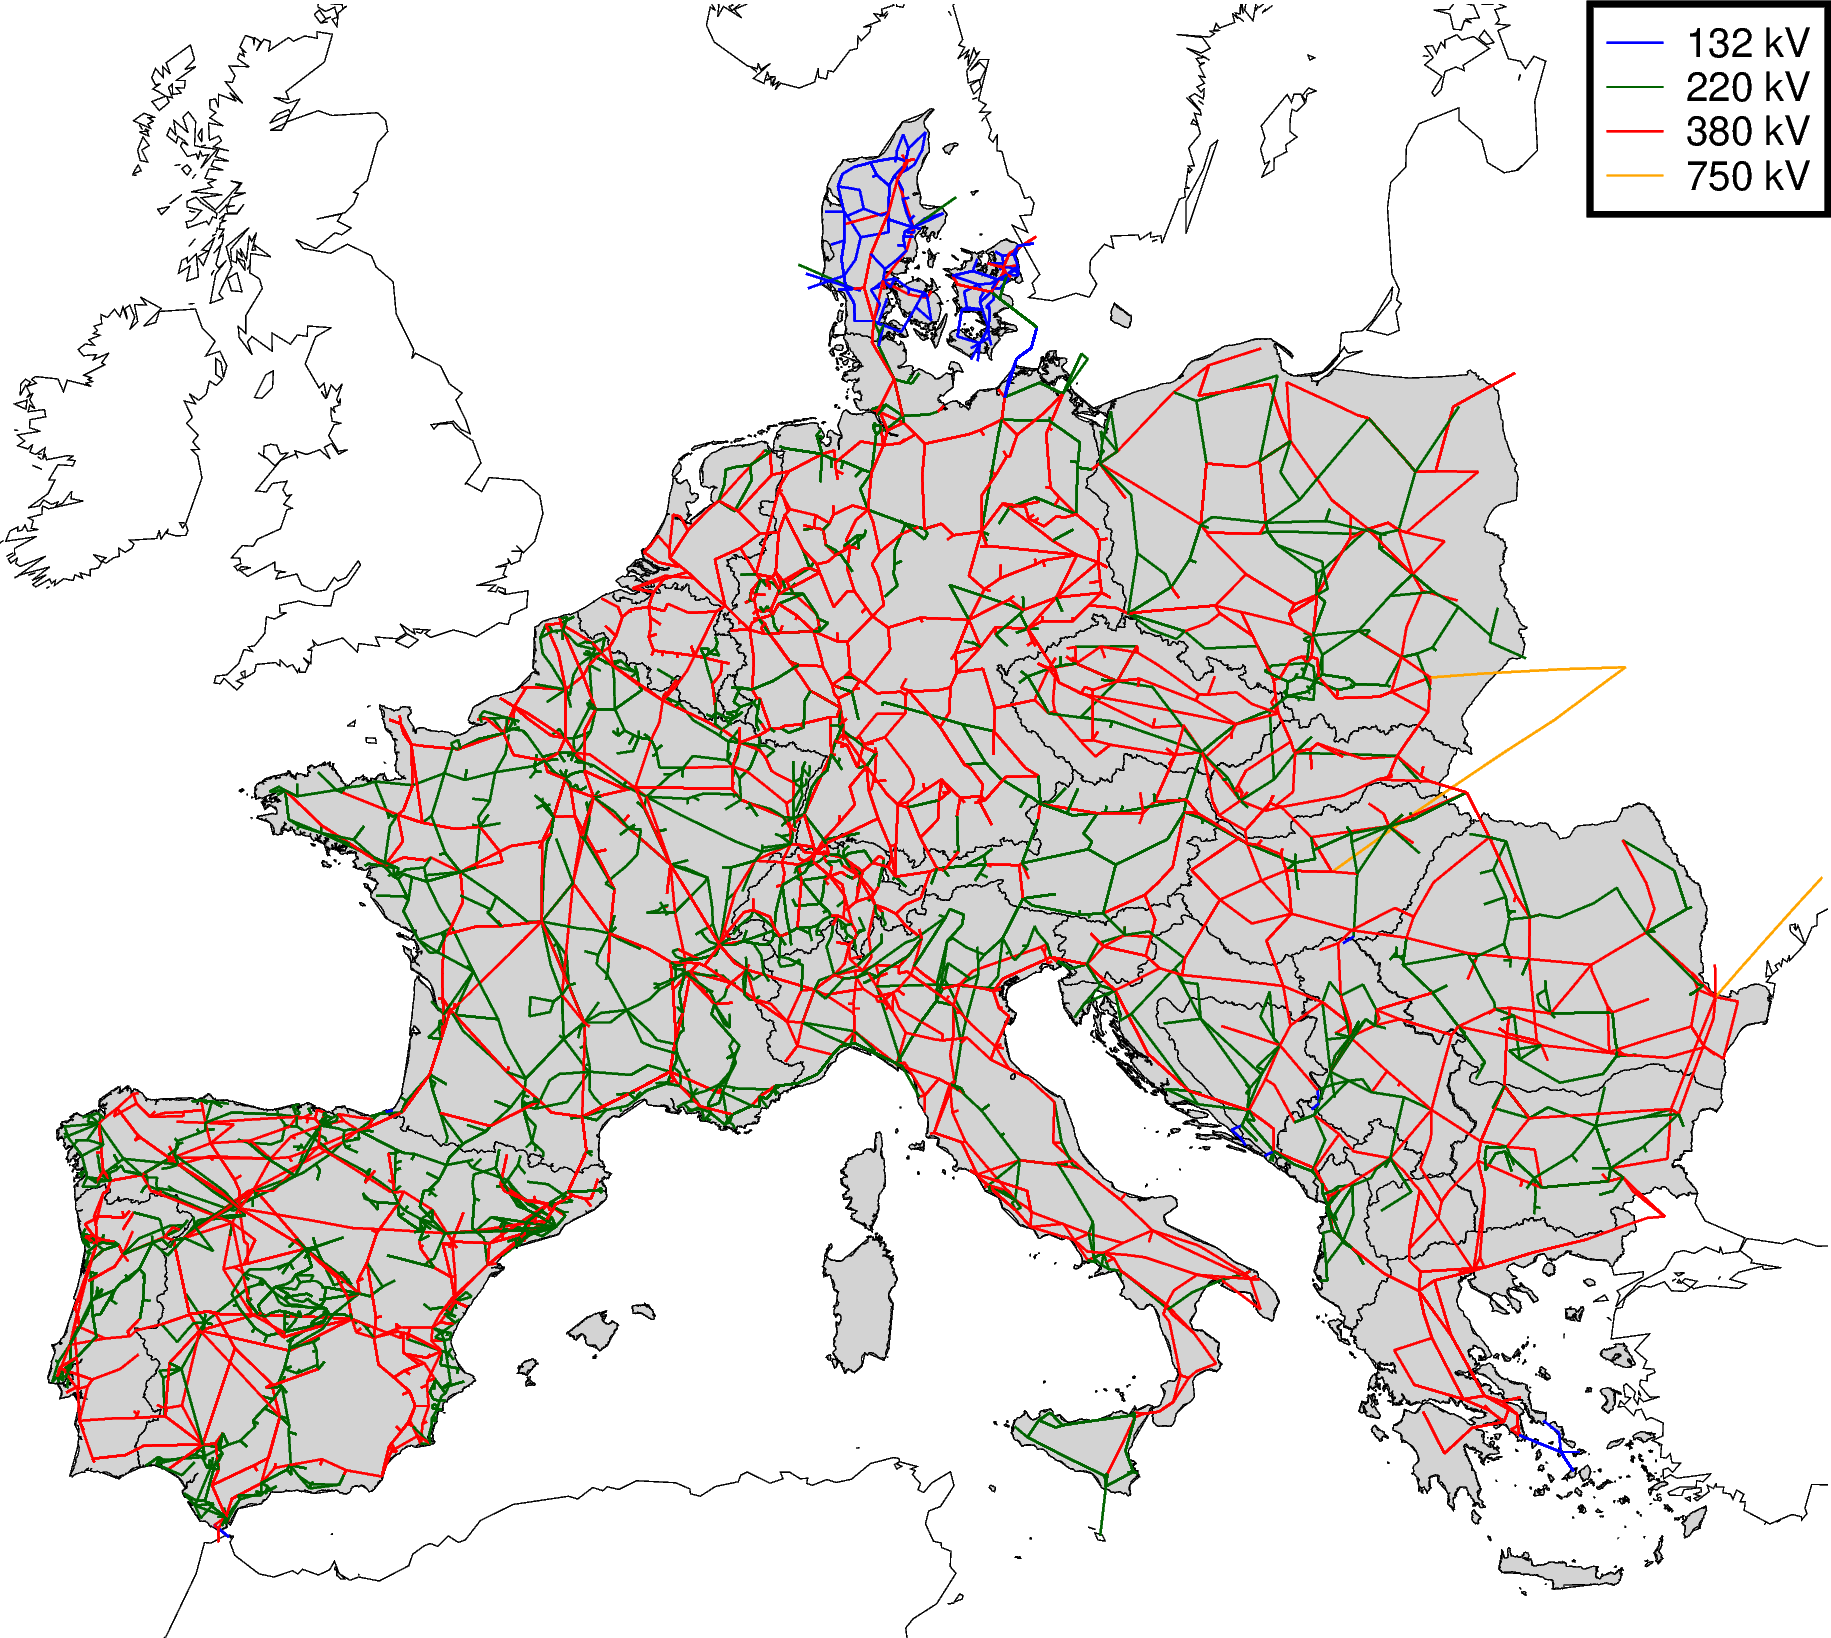

In [13]:
fig = pygmt.Figure()

fig.coast(region=region, projection='M16c', resolution='l',
          shorelines='1/0.2p,black', # coast only, no lakes
          dcw=['%s+p0.2p,black+glightgray' % country for country in countries]) # country borders

for line in lines:
    fig.plot(x = [line[0][0], line[1][0]], y = [line[0][1], line[1][1]], pen='0.5p,%s' % voltage_color[line[2]])

for v, color in voltage_color.items():
    fig.plot(x = [-30, -20], y = [0, 0], pen='0.5p,%s' % color, label='%d kV' % v)
fig.legend(position='jTR', box='+pblack+gwhite')

fig.show()

### Add generators

Also add a distinctive markers for all buses with a generator attached:

In [14]:
gen_buses = [(bus['coord'], bus['base_kv']) for bus in europe['bus'].values() if bus['bus_type'] > 1]

gen_buses_by_voltage = {v: [] for v in voltage_levels}
for coord, v in gen_buses:
    gen_buses_by_voltage[v] += [coord]

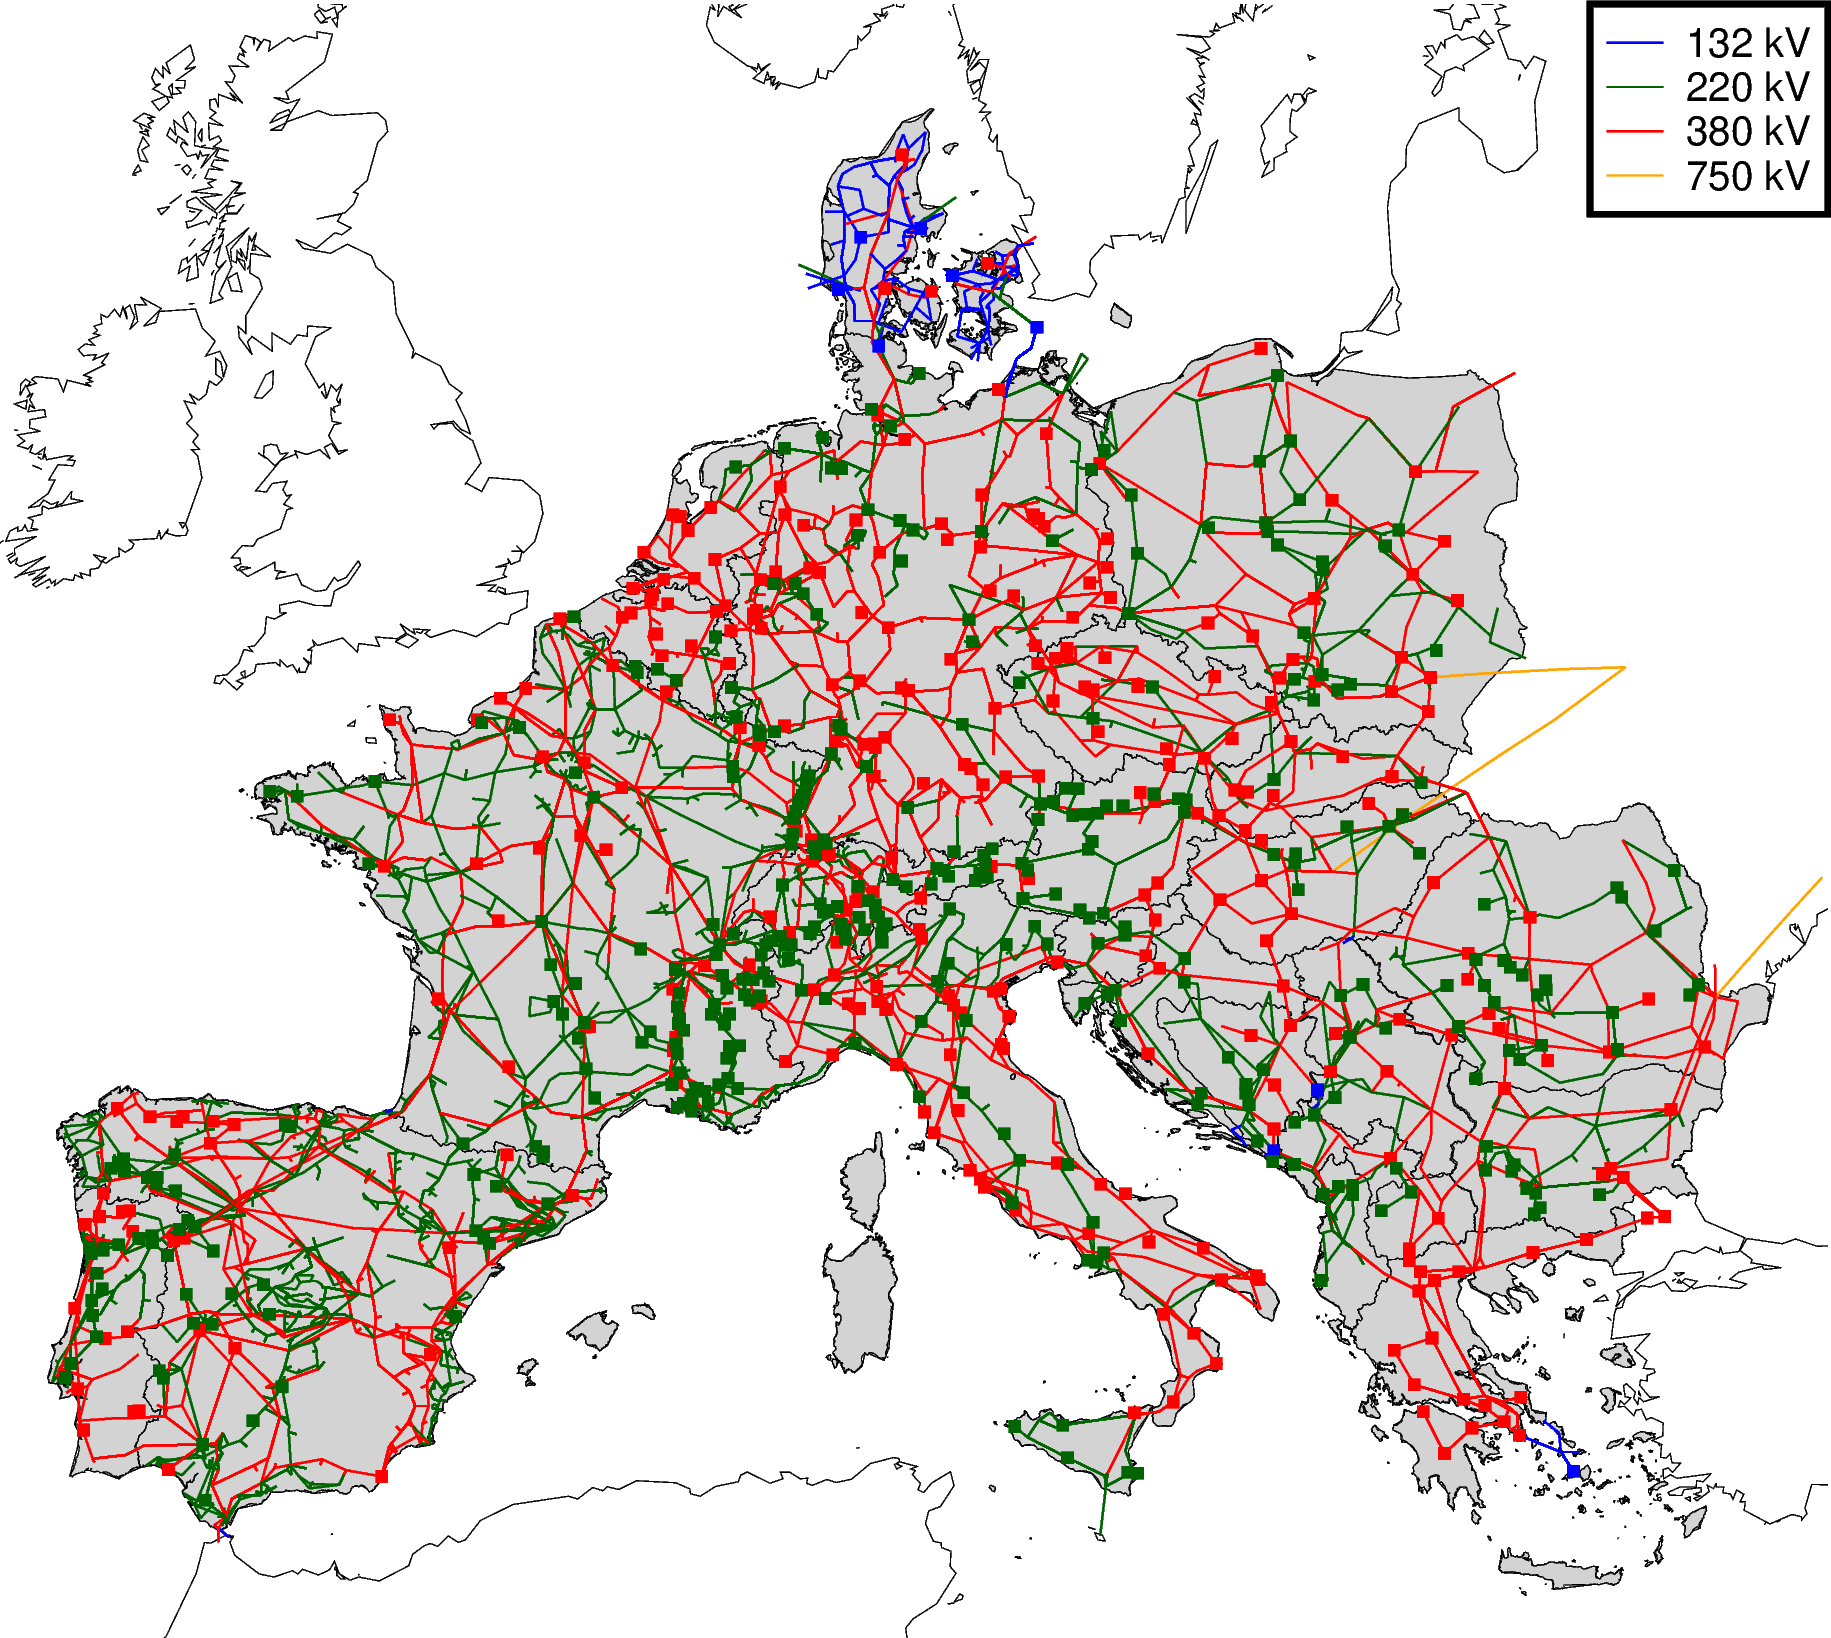

In [15]:
fig = pygmt.Figure()

fig.coast(region=region, projection='M16c', resolution='l',
          shorelines='1/0.2p,black', # coast only, no lakes
          dcw=['%s+p0.2p,black+glightgray' % country for country in countries]) # country borders

for line in lines:
    fig.plot(x = [line[0][0], line[1][0]], y = [line[0][1], line[1][1]], pen='0.5p,%s' % voltage_color[line[2]])

for v in voltage_levels:
    fig.plot(data = gen_buses_by_voltage[v], style='s0.15c', fill=voltage_color[v])

for v, color in voltage_color.items():
    fig.plot(x = [-30, -20], y = [0, 0], pen='0.5p,%s' % color, label='%d kV' % v)
# fig.plot(data = [[-30, 0]], style='s0.15c', fill='black', label='generator')
fig.legend(position='jTR', box='+pblack+gwhite')

fig.savefig('../figures/europe.pdf')
# fig.savefig('../figures/europe.png')
fig.show()

## Map of Switzerland

In [16]:
CH_region = [5.6, 10.9, 45.6, 48.0]

In [17]:
CH_lines = [(switzerland['bus'][str(line['f_bus'])]['coord'], switzerland['bus'][str(line['t_bus'])]['coord'],
          switzerland['bus'][str(line['f_bus'])]['base_kv'])
         for line in switzerland['branch'].values() if line['transformer'] == False]

CH_gen_buses = [(bus['coord'], bus['base_kv']) for bus in switzerland['bus'].values() if bus['bus_type'] > 1]

CH_gen_buses_by_voltage = {v: [] for v in voltage_levels}
for coord, v in CH_gen_buses:
    CH_gen_buses_by_voltage[v] += [coord]

unused_voltages = [v for v, buses in CH_gen_buses_by_voltage.items() if len(buses) == 0]
for v in unused_voltages:
    del CH_gen_buses_by_voltage[v]

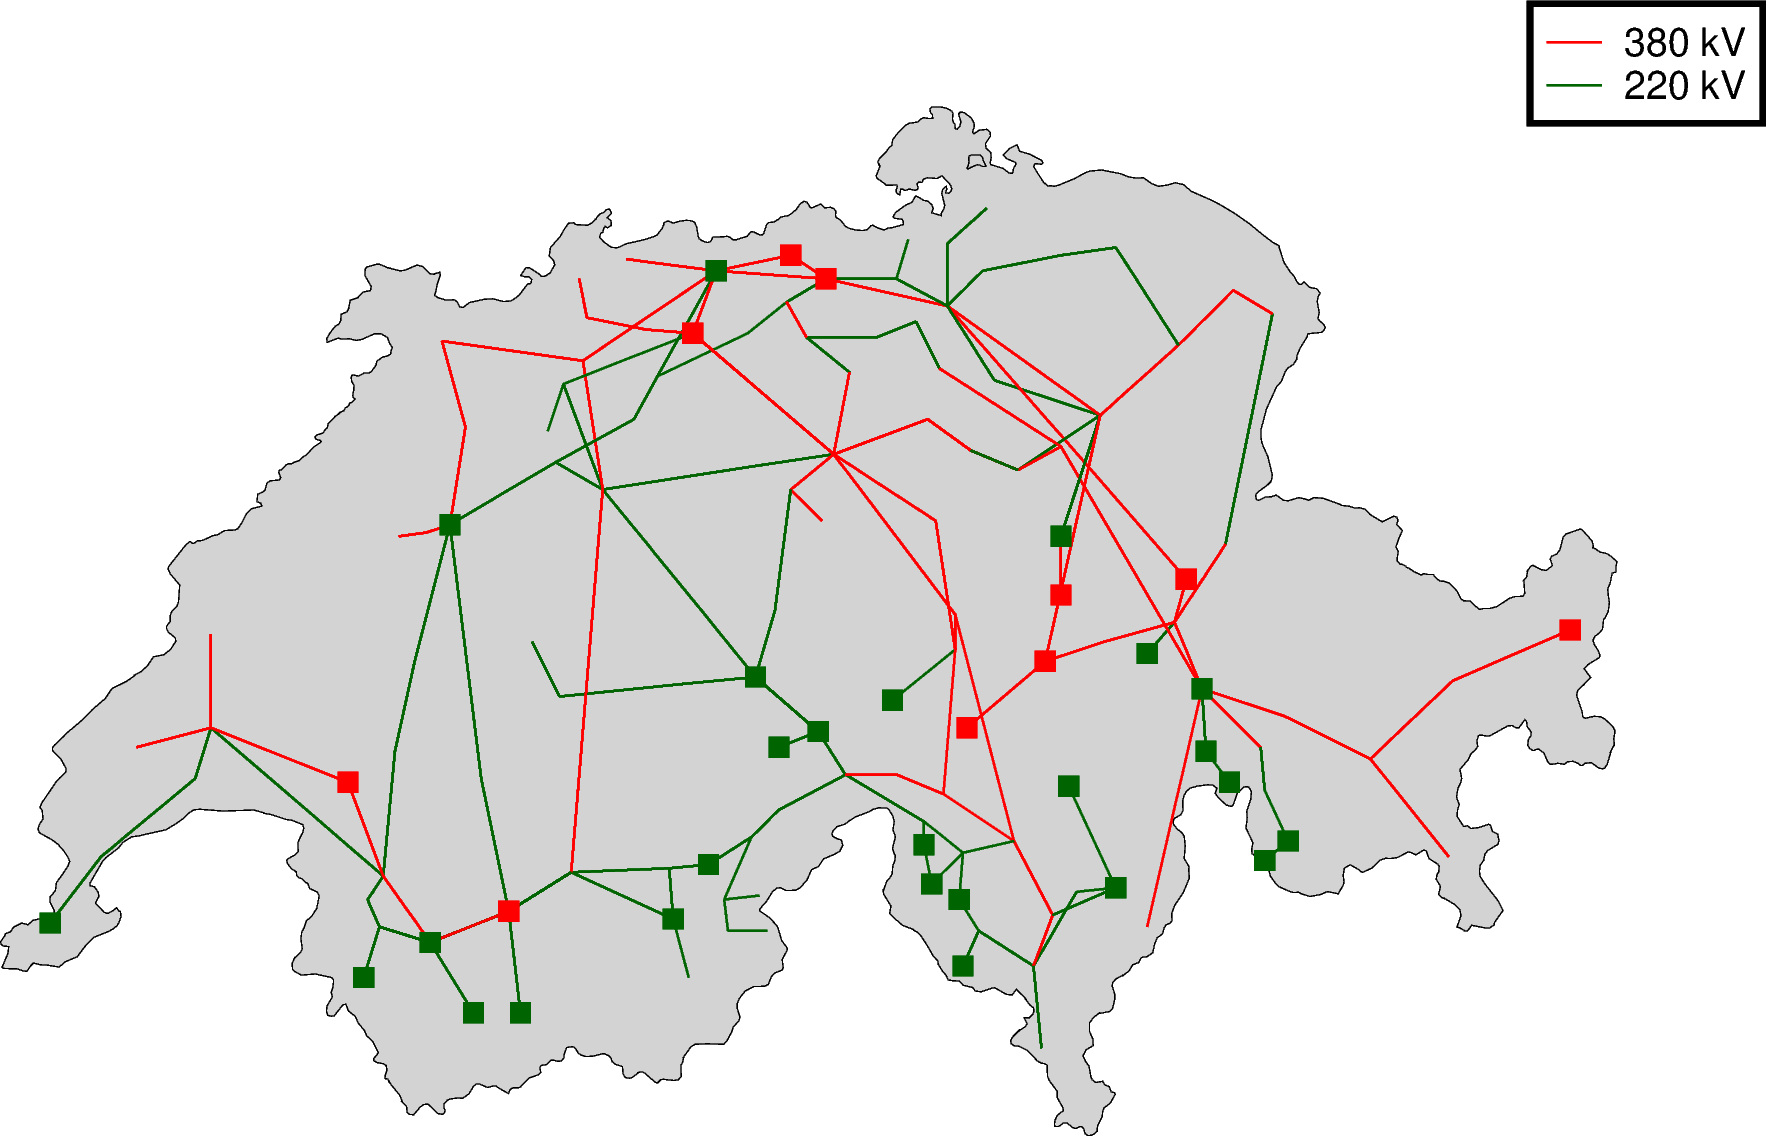

In [18]:
fig = pygmt.Figure()

fig.coast(region=CH_region, projection='M16c', resolution='i',
          dcw=['CH+p0.2p,black+glightgray']) # country borders

for line in CH_lines:
    fig.plot(x = [line[0][0], line[1][0]], y = [line[0][1], line[1][1]], pen='0.5p,%s' % voltage_color[line[2]])

for v, data in CH_gen_buses_by_voltage.items():
    fig.plot(data = data, style='s0.25c', fill=voltage_color[v])

for v in CH_gen_buses_by_voltage.keys():
    fig.plot(x = [-30, -20], y = [0, 0], pen='0.5p,%s' % voltage_color[v], label='%d kV' % v)
# fig.plot(data = [[-30, 0]], style='s0.25c', fill='black', label='generator')
fig.legend(position='jTR', box='+pblack+gwhite')

# fig.savefig('../figures/switzerland.pdf')
fig.show()

## Map of Germany

In [19]:
DE_region = [5.5, 15.5, 47.0, 55.5]

In [20]:
DE_lines = [(germany['bus'][str(line['f_bus'])]['coord'], germany['bus'][str(line['t_bus'])]['coord'],
          germany['bus'][str(line['f_bus'])]['base_kv'])
         for line in germany['branch'].values() if line['transformer'] == False]

DE_gen_buses = [(bus['coord'], bus['base_kv']) for bus in germany['bus'].values() if bus['bus_type'] > 1]

DE_gen_buses_by_voltage = {v: [] for v in voltage_levels}
for coord, v in DE_gen_buses:
    DE_gen_buses_by_voltage[v] += [coord]

unused_voltages = [v for v, buses in DE_gen_buses_by_voltage.items() if len(buses) == 0]
for v in unused_voltages:
    del DE_gen_buses_by_voltage[v]

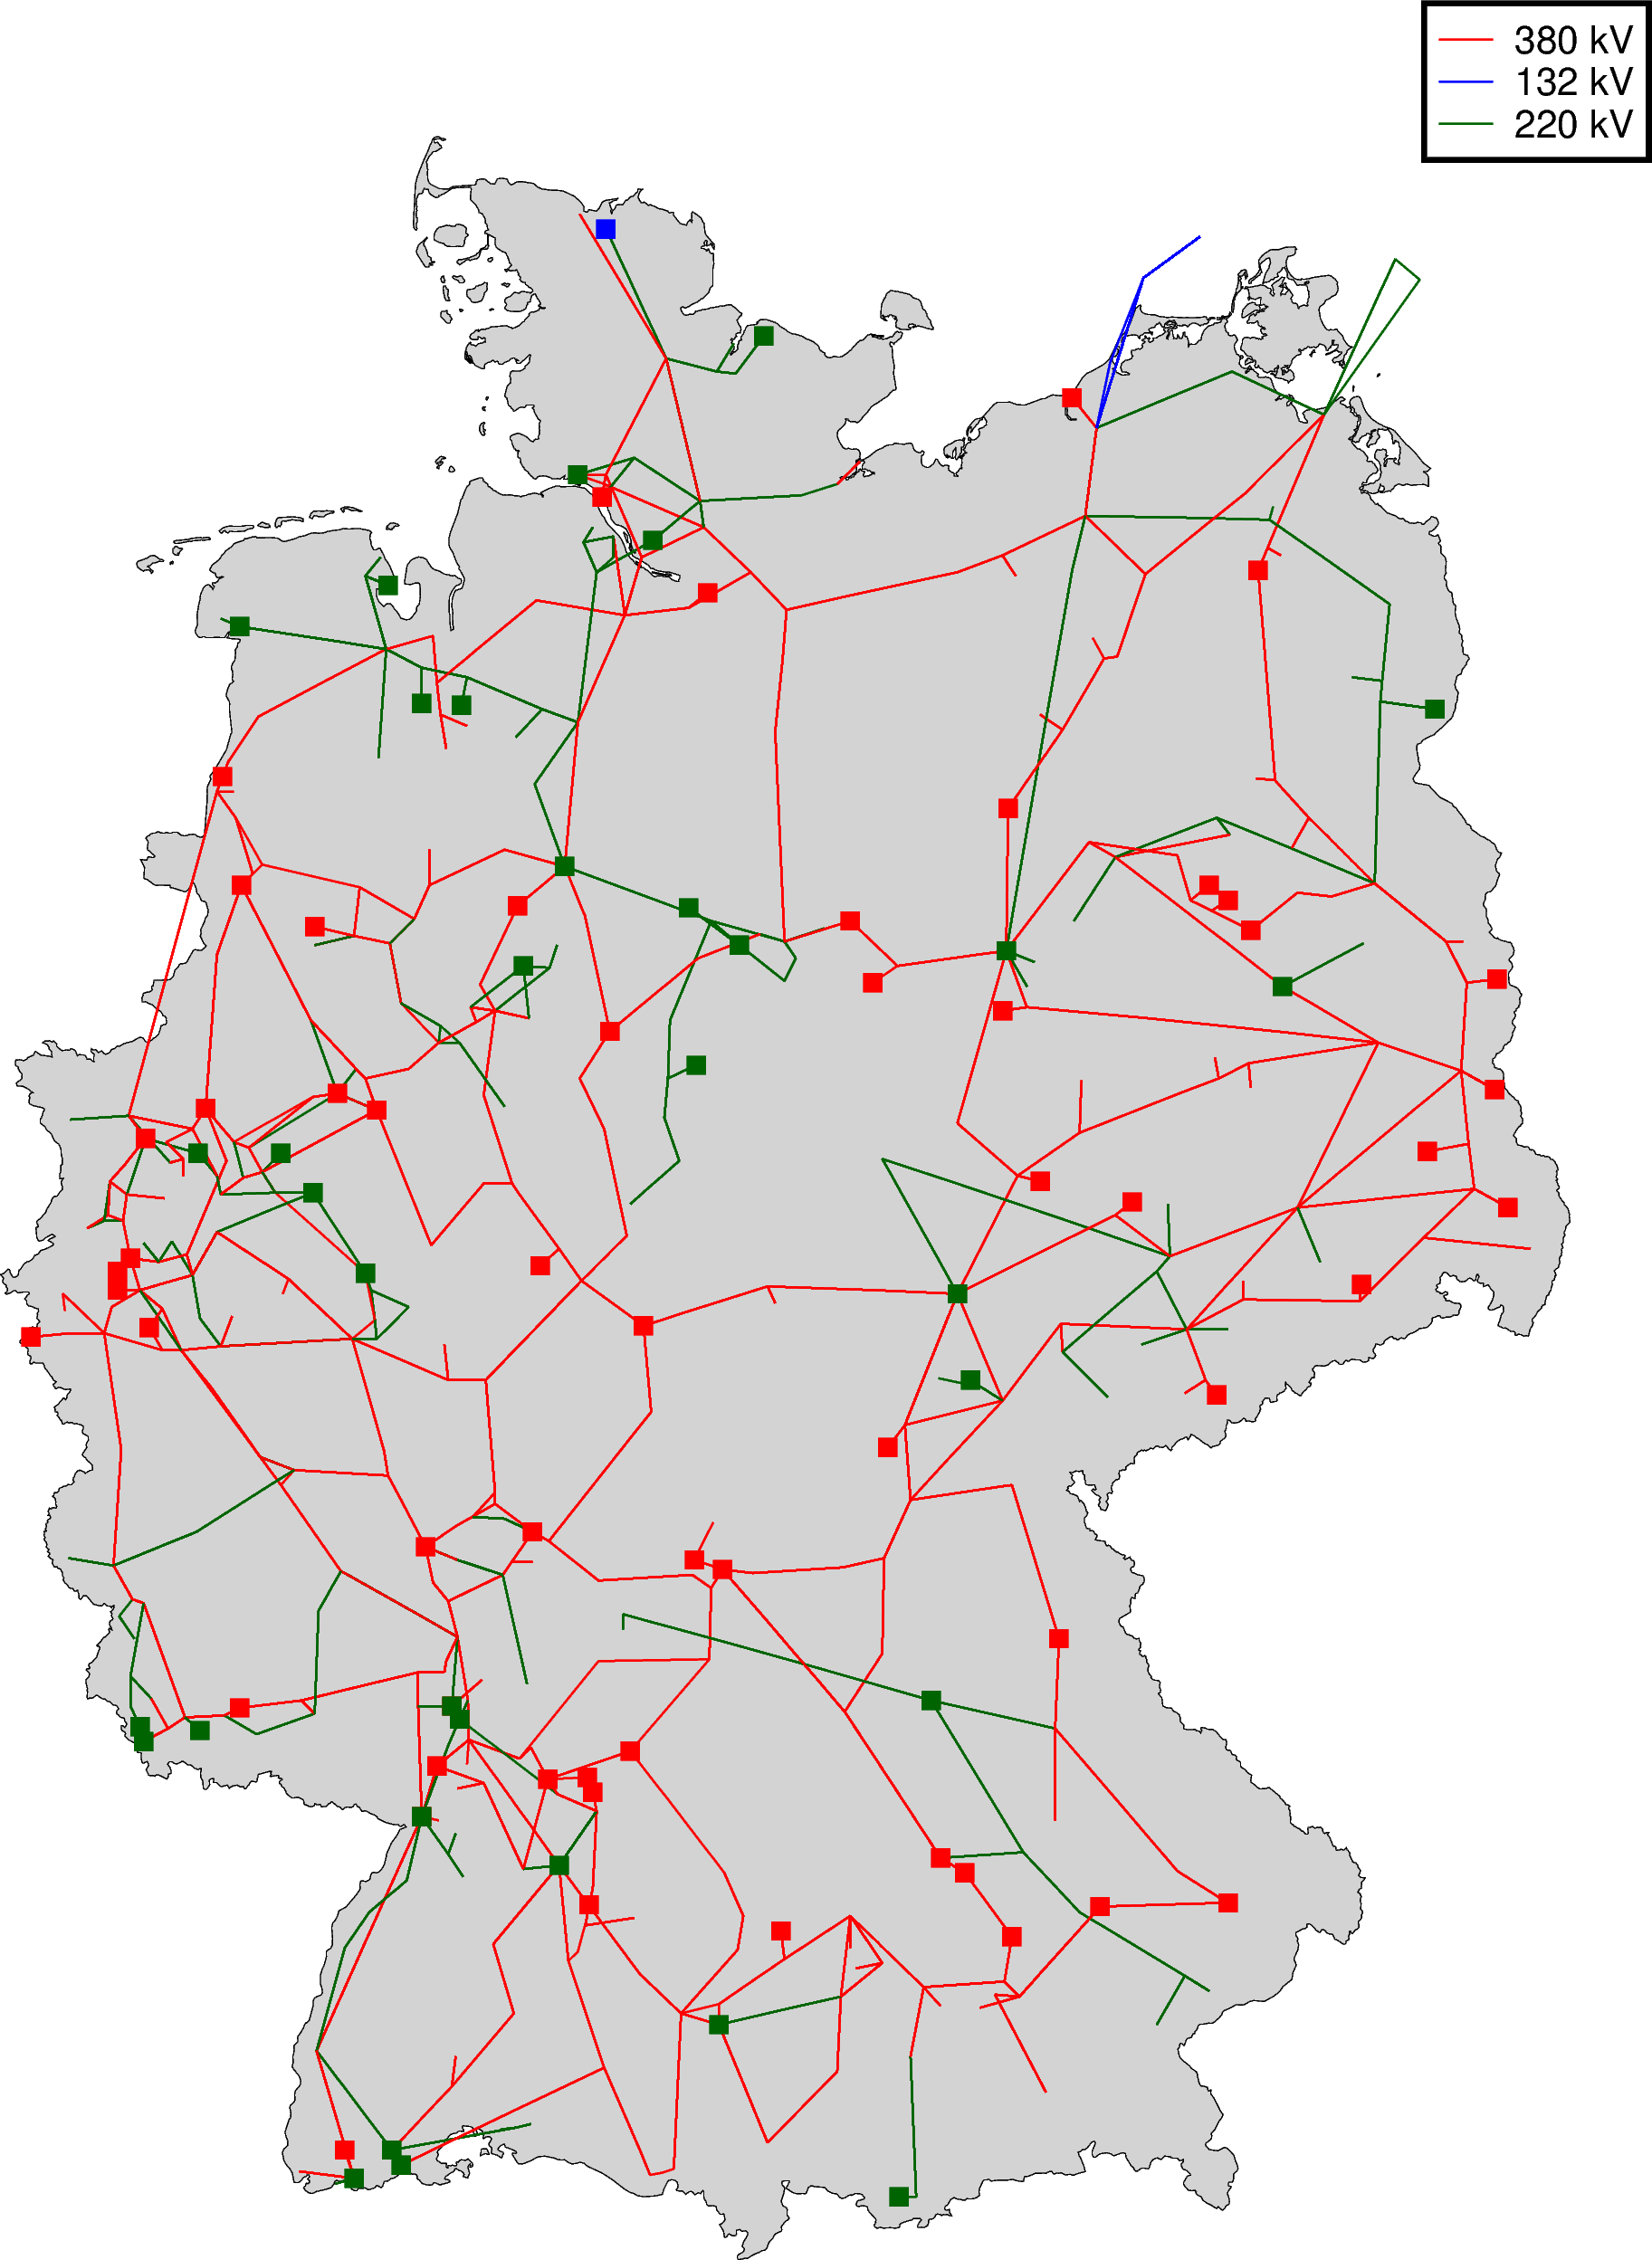

In [21]:
fig = pygmt.Figure()

fig.coast(region=DE_region, projection='M16c', resolution='i',
          dcw=['DE+p0.2p,black+glightgray']) # country borders

for line in DE_lines:
    fig.plot(x = [line[0][0], line[1][0]], y = [line[0][1], line[1][1]], pen='0.5p,%s' % voltage_color[line[2]])

for v, data in DE_gen_buses_by_voltage.items():
    fig.plot(data = data, style='s0.25c', fill=voltage_color[v])

for v in DE_gen_buses_by_voltage.keys():
    fig.plot(x = [-30, -20], y = [0, 0], pen='0.5p,%s' % voltage_color[v], label='%d kV' % v)
# fig.plot(data = [[-30, 0]], style='s0.25c', fill='black', label='generator')
fig.legend(position='jTR', box='+pblack+gwhite')

fig.savefig('../figures/germany.pdf')
fig.show()

## Map of France

In [22]:
FR_region = [-5.5, 8.5, 42.0, 51.5]

In [23]:
FR_lines = [(france['bus'][str(line['f_bus'])]['coord'], france['bus'][str(line['t_bus'])]['coord'],
          france['bus'][str(line['f_bus'])]['base_kv'])
         for line in france['branch'].values() if line['transformer'] == False]

FR_gen_buses = [(bus['coord'], bus['base_kv']) for bus in france['bus'].values() if bus['bus_type'] > 1]

FR_gen_buses_by_voltage = {v: [] for v in voltage_levels}
for coord, v in FR_gen_buses:
    FR_gen_buses_by_voltage[v] += [coord]

unused_voltages = [v for v, buses in FR_gen_buses_by_voltage.items() if len(buses) == 0]
for v in unused_voltages:
    del FR_gen_buses_by_voltage[v]

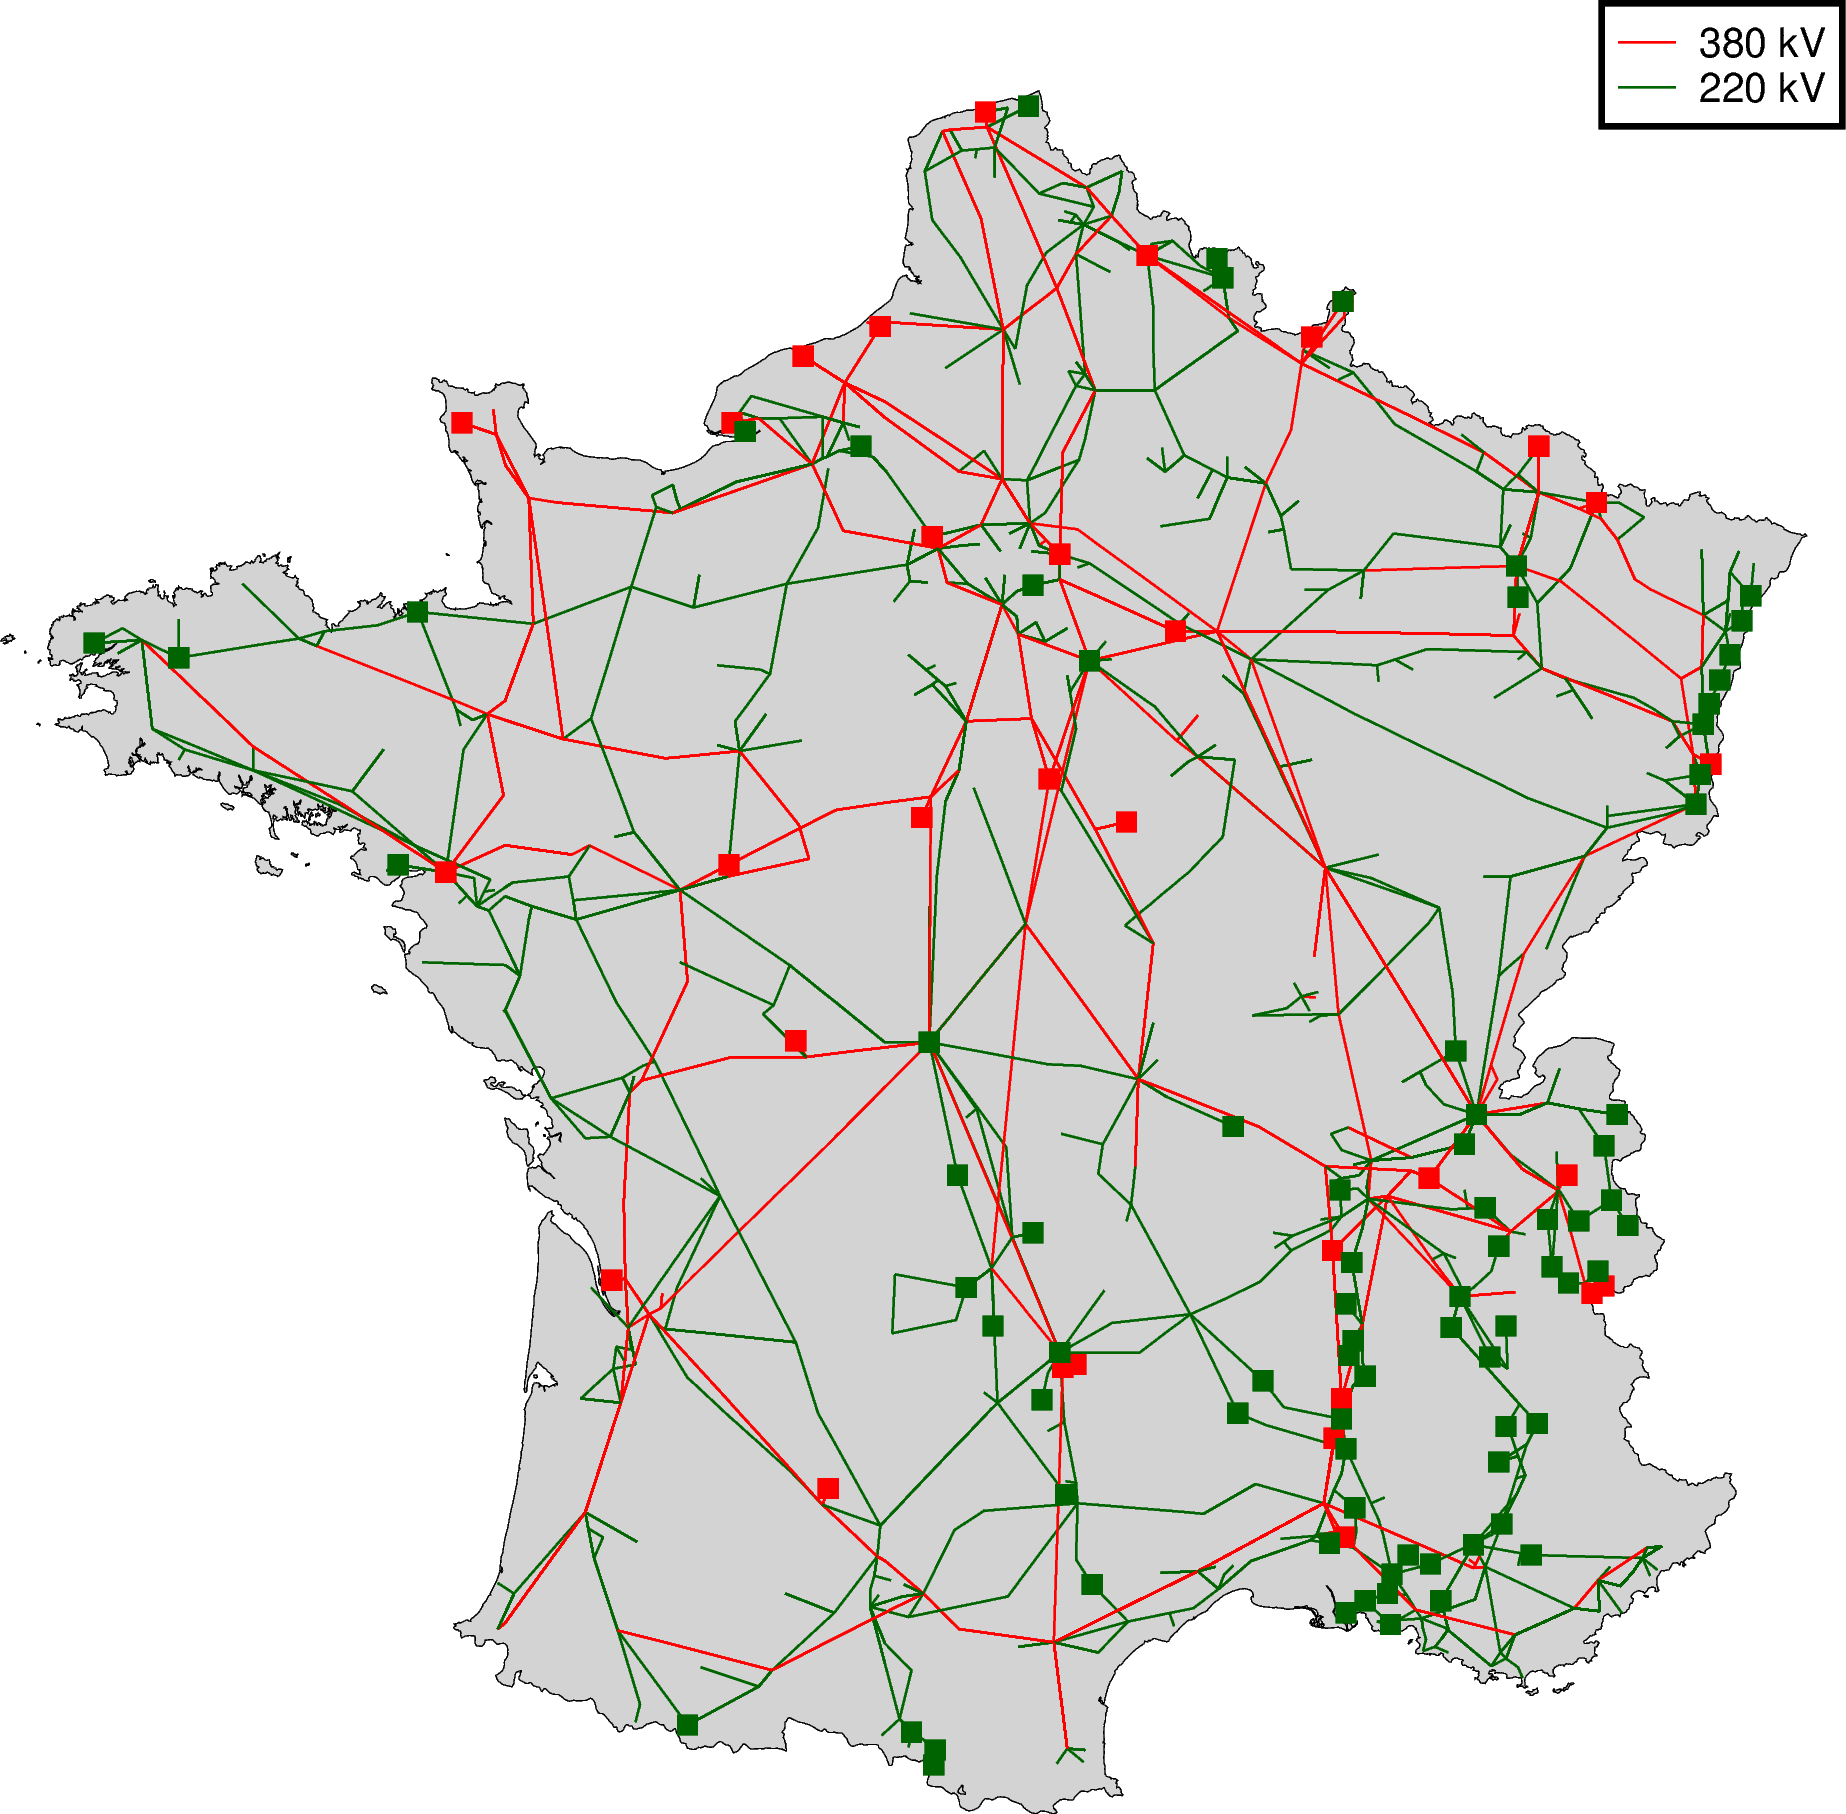

In [24]:
fig = pygmt.Figure()

fig.coast(region=FR_region, projection='M16c', resolution='i',
          dcw=['FR+p0.2p,black+glightgray']) # country borders

for line in FR_lines:
    fig.plot(x = [line[0][0], line[1][0]], y = [line[0][1], line[1][1]], pen='0.5p,%s' % voltage_color[line[2]])

for v, data in FR_gen_buses_by_voltage.items():
    fig.plot(data = data, style='s0.25c', fill=voltage_color[v])

for v in FR_gen_buses_by_voltage.keys():
    fig.plot(x = [-30, -20], y = [0, 0], pen='0.5p,%s' % voltage_color[v], label='%d kV' % v)
# fig.plot(data = [[-30, 0]], style='s0.25c', fill='black', label='generator')
fig.legend(position='jTR', box='+pblack+gwhite')

fig.savefig('../figures/france.pdf')
fig.show()

## Map of Spain

In [25]:
ES_region = [-10.5, 4.0, 35.5, 44.0]

In [26]:
ES_lines = [(spain['bus'][str(line['f_bus'])]['coord'], spain['bus'][str(line['t_bus'])]['coord'],
          spain['bus'][str(line['f_bus'])]['base_kv'])
         for line in spain['branch'].values() if line['transformer'] == False]

ES_gen_buses = [(bus['coord'], bus['base_kv']) for bus in spain['bus'].values() if bus['bus_type'] > 1]

ES_gen_buses_by_voltage = {v: [] for v in voltage_levels}
for coord, v in ES_gen_buses:
    ES_gen_buses_by_voltage[v] += [coord]

unused_voltages = [v for v, buses in ES_gen_buses_by_voltage.items() if len(buses) == 0]
for v in unused_voltages:
    del ES_gen_buses_by_voltage[v]

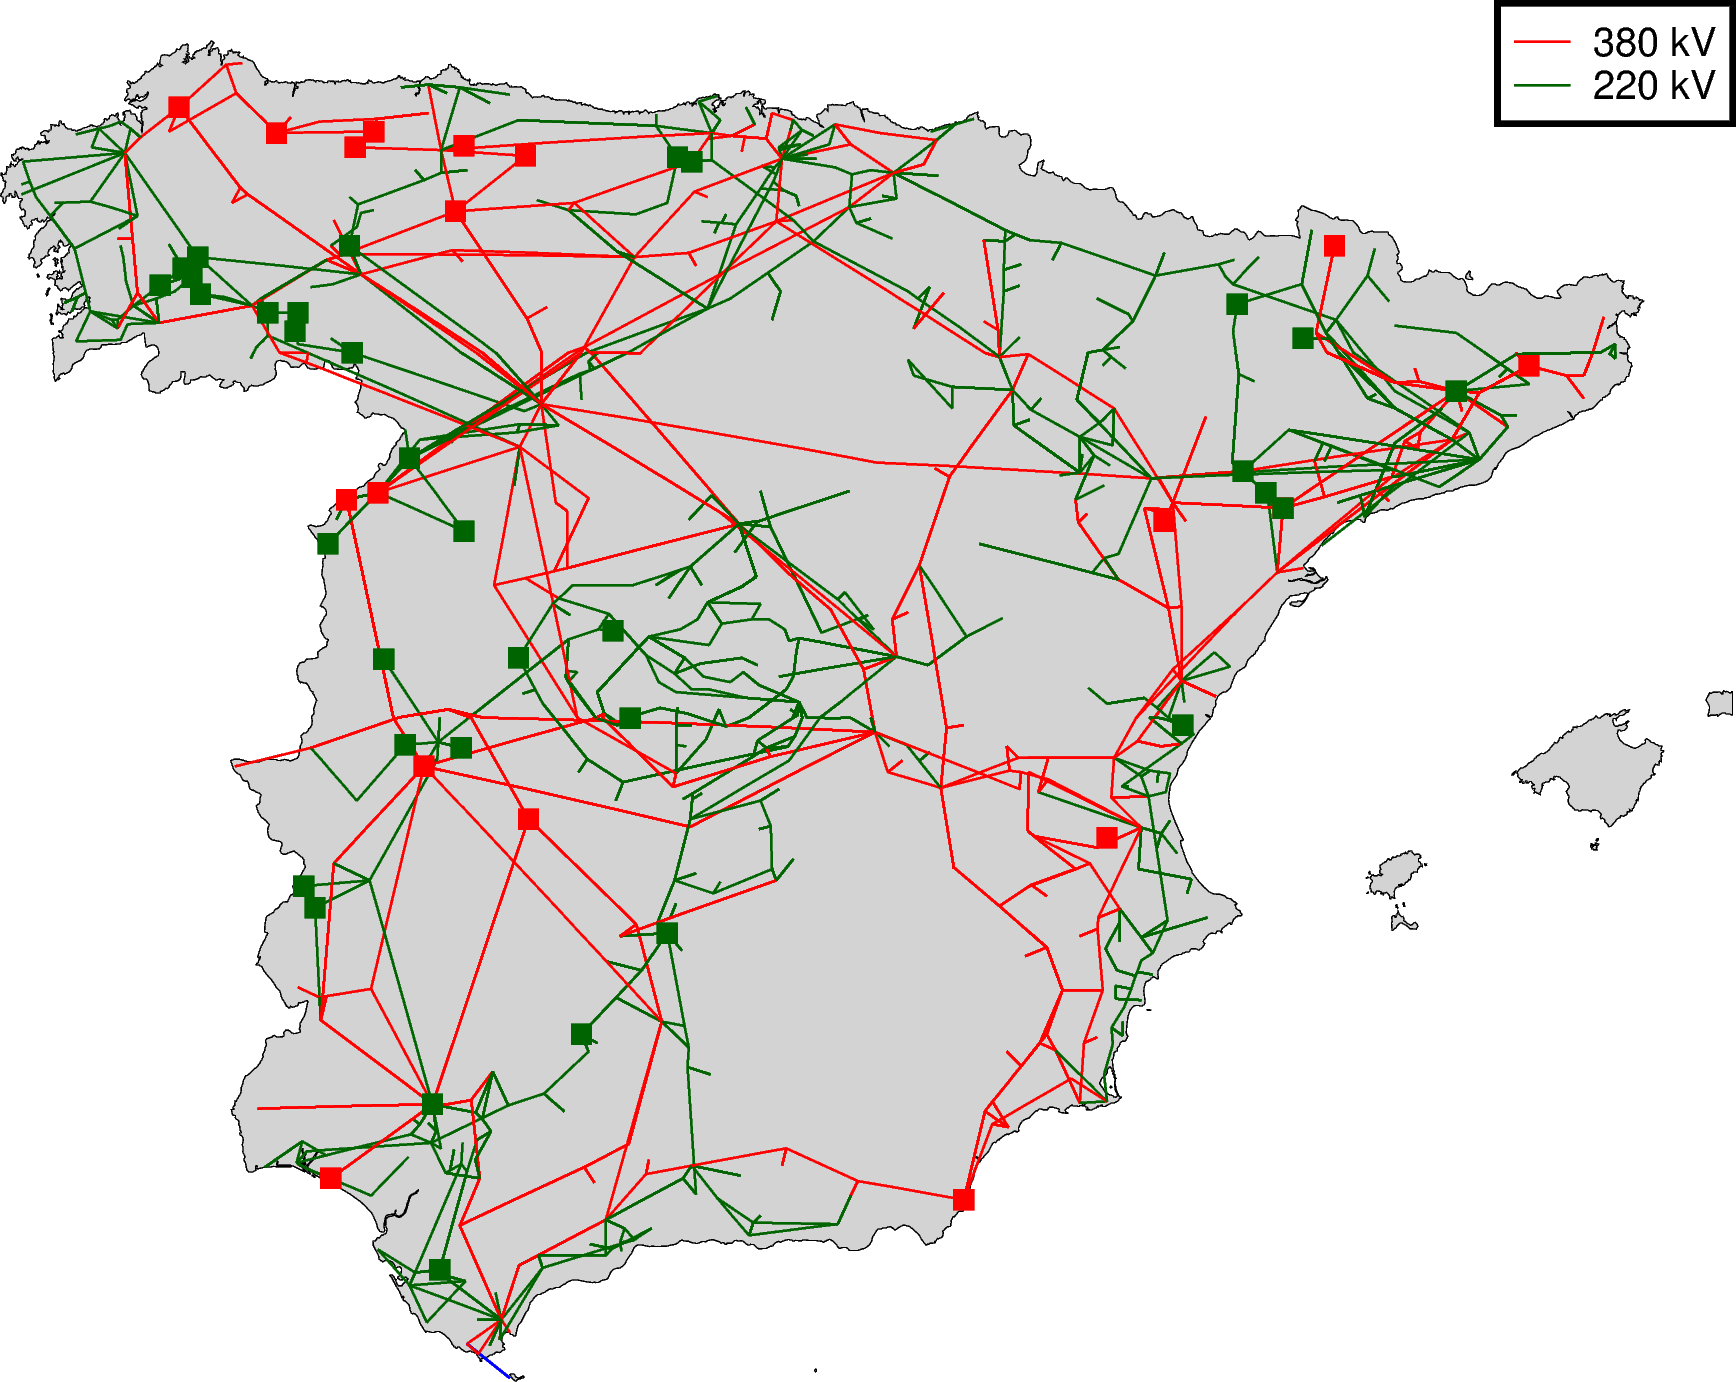

In [27]:
fig = pygmt.Figure()

fig.coast(region=ES_region, projection='M16c', resolution='i',
          dcw=['ES+p0.2p,black+glightgray']) # country borders

for line in ES_lines:
    fig.plot(x = [line[0][0], line[1][0]], y = [line[0][1], line[1][1]], pen='0.5p,%s' % voltage_color[line[2]])

for v, data in ES_gen_buses_by_voltage.items():
    fig.plot(data = data, style='s0.25c', fill=voltage_color[v])

for v in ES_gen_buses_by_voltage.keys():
    fig.plot(x = [-30, -20], y = [0, 0], pen='0.5p,%s' % voltage_color[v], label='%d kV' % v)
# fig.plot(data = [[-30, 0]], style='s0.25c', fill='black', label='generator')
fig.legend(position='jTR', box='+pblack+gwhite')

fig.savefig('../figures/spain.pdf')
fig.show()

## Map of Italy

In [28]:
IT_region = [5.5, 19.0, 35.5, 47.5]

In [29]:
IT_lines = [(italy['bus'][str(line['f_bus'])]['coord'], italy['bus'][str(line['t_bus'])]['coord'],
          italy['bus'][str(line['f_bus'])]['base_kv'])
         for line in italy['branch'].values() if line['transformer'] == False]

IT_gen_buses = [(bus['coord'], bus['base_kv']) for bus in italy['bus'].values() if bus['bus_type'] > 1]

IT_gen_buses_by_voltage = {v: [] for v in voltage_levels}
for coord, v in IT_gen_buses:
    IT_gen_buses_by_voltage[v] += [coord]

unused_voltages = [v for v, buses in IT_gen_buses_by_voltage.items() if len(buses) == 0]
for v in unused_voltages:
    del IT_gen_buses_by_voltage[v]

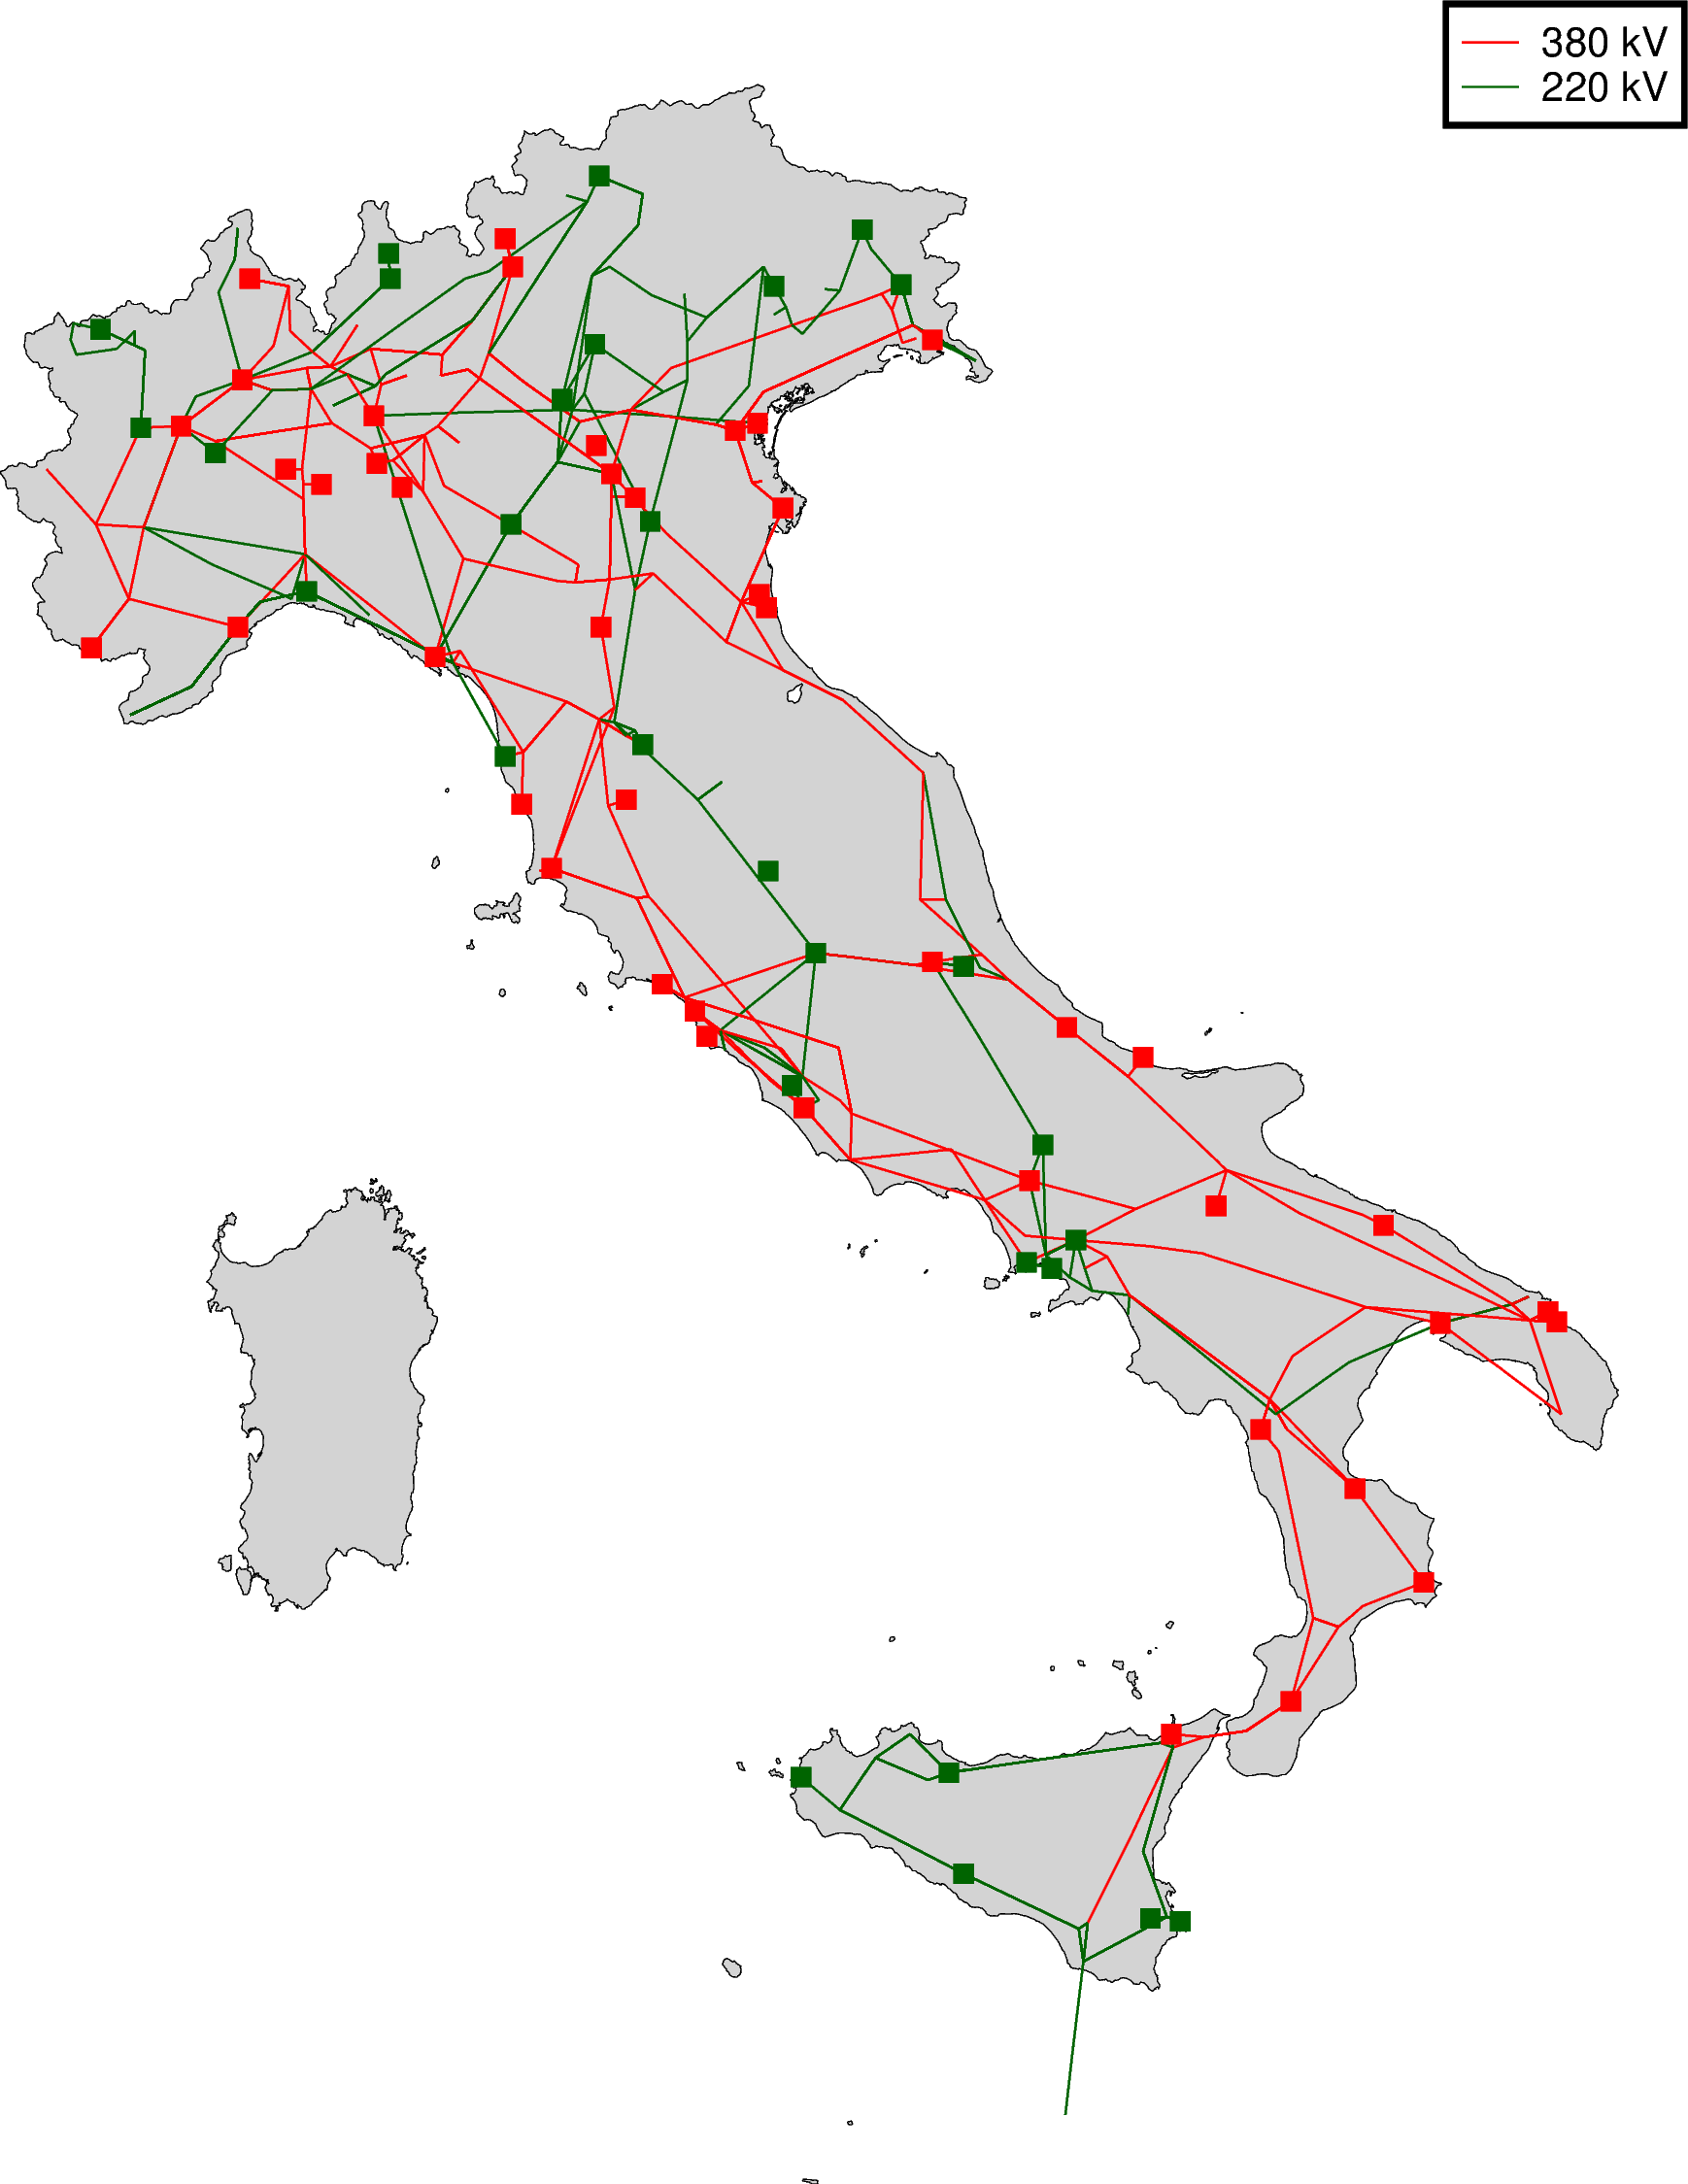

In [30]:
fig = pygmt.Figure()

fig.coast(region=IT_region, projection='M16c', resolution='i',
          dcw=['IT+p0.2p,black+glightgray']) # country borders

for line in IT_lines:
    fig.plot(x = [line[0][0], line[1][0]], y = [line[0][1], line[1][1]], pen='0.5p,%s' % voltage_color[line[2]])

for v, data in IT_gen_buses_by_voltage.items():
    fig.plot(data = data, style='s0.25c', fill=voltage_color[v])

for v in IT_gen_buses_by_voltage.keys():
    fig.plot(x = [-30, -20], y = [0, 0], pen='0.5p,%s' % voltage_color[v], label='%d kV' % v)
# fig.plot(data = [[-30, 0]], style='s0.25c', fill='black', label='generator')
fig.legend(position='jTR', box='+pblack+gwhite')

fig.savefig('../figures/italy.pdf')
fig.show()

## Map of Europe with Switzerland as inset

The detailed map of Switzerland can also be combined with the map of the entire network:

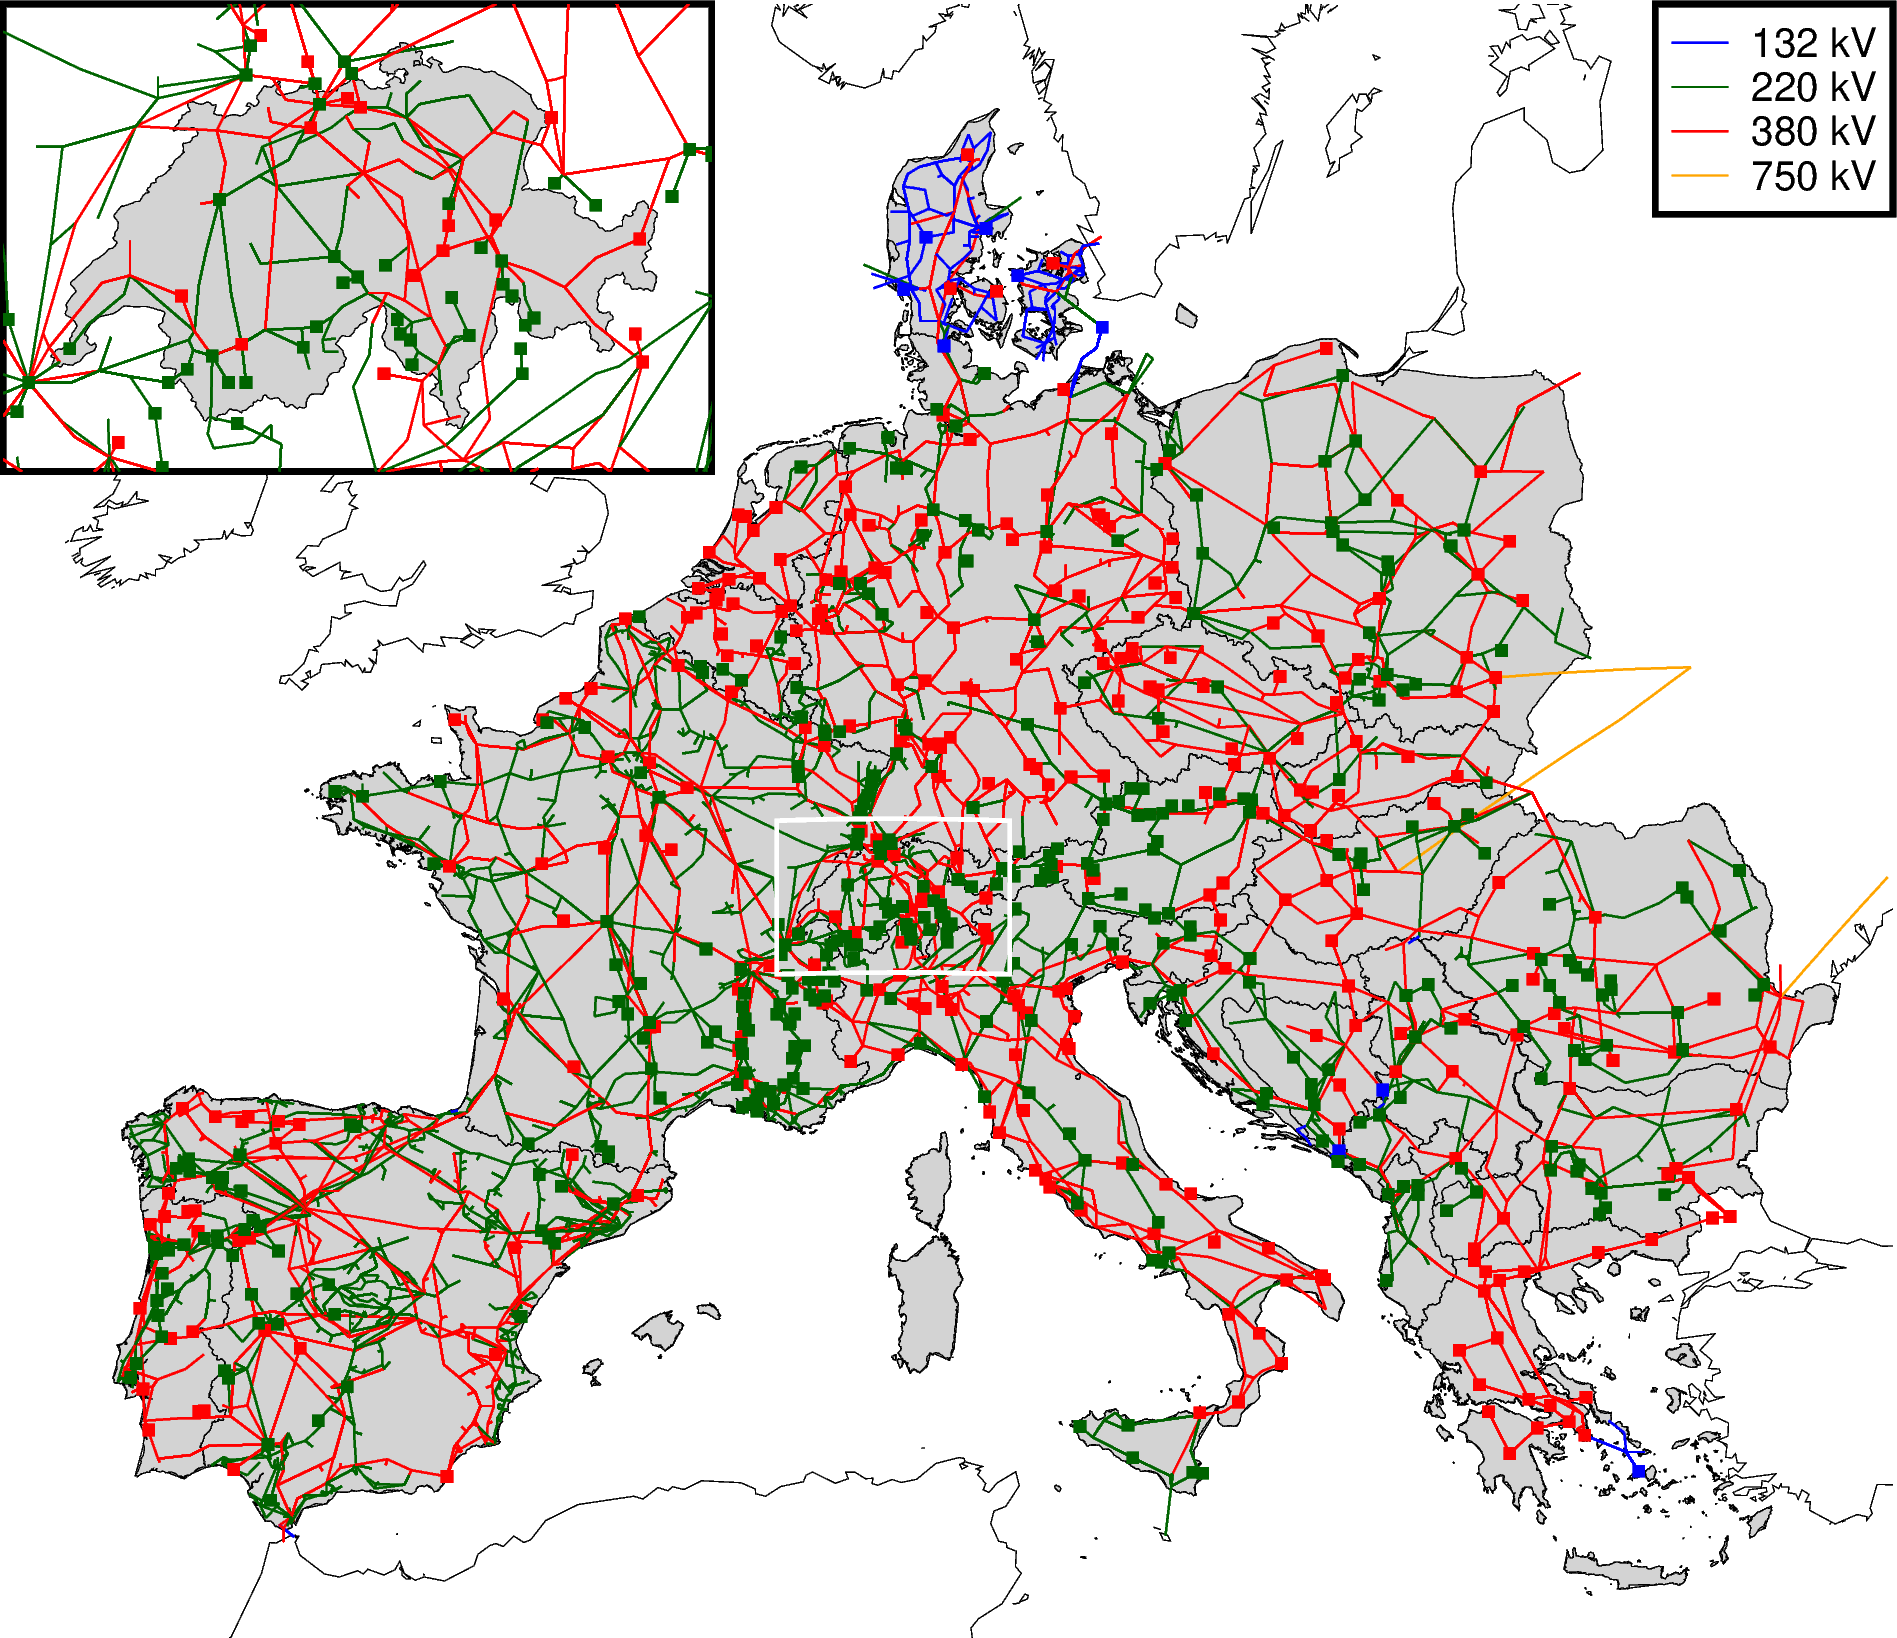

In [31]:
fig = pygmt.Figure()

fig.coast(region=region, projection='M16c', resolution='l',
          shorelines='1/0.2p,black', # coast only, no lakes
          dcw=['%s+p0.2p,black+glightgray' % country for country in countries]) # country borders

for line in lines:
    fig.plot(x = [line[0][0], line[1][0]], y = [line[0][1], line[1][1]], pen='0.5p,%s' % voltage_color[line[2]])

for v in voltage_levels:
    fig.plot(data = gen_buses_by_voltage[v], style='s0.15c', fill=voltage_color[v])

fig.plot(x = [CH_region[0], CH_region[1], CH_region[1], CH_region[0], CH_region[0]],
         y = [CH_region[2], CH_region[2], CH_region[3], CH_region[3], CH_region[2]],
         pen='1p,white')

with fig.inset(position='jTL', region=CH_region, projection='M6c',
               box='+pblack+gwhite'):
    
    fig.coast(dcw=['CH+p0.2p,black+glightgray'], resolution='i') 
    
    for line in lines:
        fig.plot(x = [line[0][0], line[1][0]], y = [line[0][1], line[1][1]], pen='0.5p,%s' % voltage_color[line[2]])
    
    for v in voltage_levels:
        fig.plot(data = gen_buses_by_voltage[v], style='s0.15c', fill=voltage_color[v])

for v, color in voltage_color.items():
    fig.plot(x = [-30, -20], y = [0, 0], pen='0.5p,%s' % color, label='%d kV' % v)
# fig.plot(data = [[-30, 0]], style='s0.15c', fill='black', label='generator')
fig.legend(position='jTR', box='+pblack+gwhite')

fig.savefig('../figures/europe_with_inset.pdf')
fig.show()